# Machine Learning Project : Heart Failure Prediction

## 1.◆ Importing Required Libraries

In [383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer




## 2.◆ Loading the Dataset into `heart_failure_df`

In [384]:
def load_dataset(file_path):
    na_values = ['NA', 'Missing', 'NaN', '', ' ', 'null', 'None', 'N/A', 'n/a', 'UNKNOWN', 'unknown', 'undefined']
    df = pd.read_csv(file_path, na_values=na_values)
    return df


In [385]:
heart_failure_df = load_dataset("heart.csv")


In [386]:
heart_failure_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## 3.◆ Dataset Visualization and Exploration

In [387]:
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [388]:
heart_failure_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [389]:
heart_failure_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### 3.1 ◆ Getting descriptive anaylsis for numeric features inside the dataset

In [390]:
heart_failure_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### 3.2 ◆ See the description of the `hear_failure_df` for the categrical feature in our dataset

In [391]:
heart_failure_df.describe(include=['object'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


### 3.3 ◆ Plotting Histogram for Numeric Feature 

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

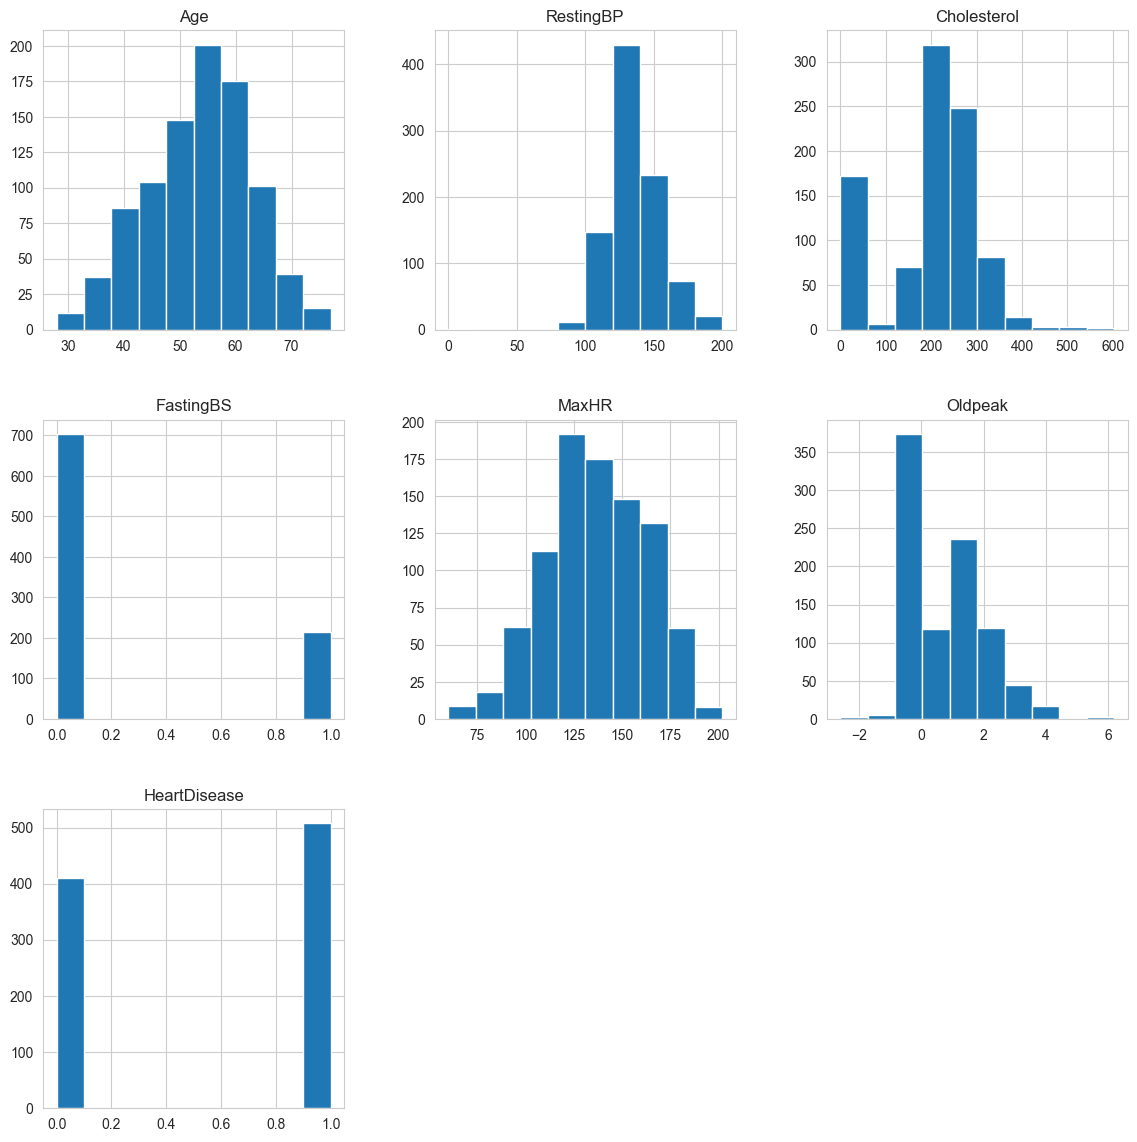

In [392]:
heart_failure_column_visualization = heart_failure_df.iloc[:,:]
heart_failure_column_visualization.hist(figsize=(14,14))

Here's a summary of the numeric features and their histograms:

1. `Age`: Most individuals are between 40 and 60 years old.
2. `RestingBP` (Resting Blood Pressure): A peak distribution around 120–140 mmHg is observed.
3. `Cholesterol`: The values range widely, with a concentration around 200–300 mg/dL.
4. `FastingBS` (Fasting Blood Sugar): It is binary (0 or 1), indicating whether fasting blood sugar >120 mg/dL, with a majority of values being 0.
5. `MaxHR` (Maximum Heart Rate Achieved): Distributed mostly between 100 and 170 bpm, indicating a healthy range for most individuals.
6. `Oldpeak`: Represents ST depression induced by exercise, mostly concentrated around 0–2.
7. `HeartDisease`: Binary target variable (0 for no heart disease, 1 for presence), with slightly more cases of 1 than 0.


### 3.4 ◆ Plotting Kdenisty Graphs for the data :

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

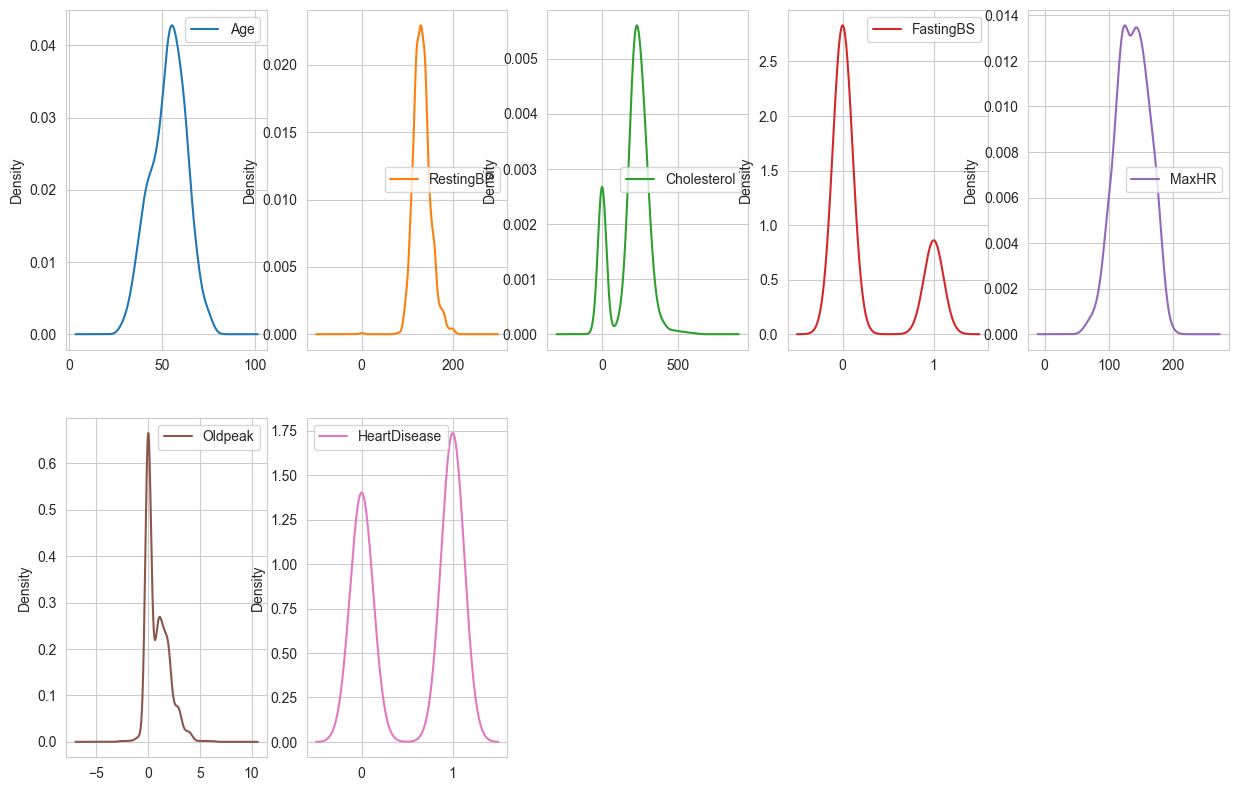

In [393]:
heart_failure_kDenisty = heart_failure_df.loc[:,['Age','RestingBP','Cholesterol','FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']]
heart_failure_kDenisty.plot(kind='density', subplots=True, layout=(3,5), sharex=False,figsize=(15,15))



1. `Age`: Shows a normal distribution centered around middle-aged individuals, with fewer younger and older participants.
2. `RestingBP`: Concentrated in a narrow range, peaking around 120–140 mmHg, representing typical resting blood pressure levels.
3. `Cholesterol`: Skewed distribution with most values between 150 and 300 mg/dL, indicating typical cholesterol levels.
4. `FastingBS`: A binary feature with two peaks at 0 and 1, indicating fasting blood sugar levels below and above 120 mg/dL.
5. `MaxHR`: Normally distributed with values centered around 130–150 bpm, reflecting the typical maximum heart rate during exercise.
6. `Oldpeak`: Highly concentrated near 0, representing minimal ST depression, with some outliers.
7. `HeartDisease`: Bimodal distribution, showing the balance between individuals with (1) and without (0) heart disease.

These plots help understand the central tendencies and spread of the features, aiding in further data exploration and preprocessing.

#### 3.5 ◆ Probability density function (PDF) plots for numeric features in the dataset display their distributions along with statistical markers (mean, median, mode)

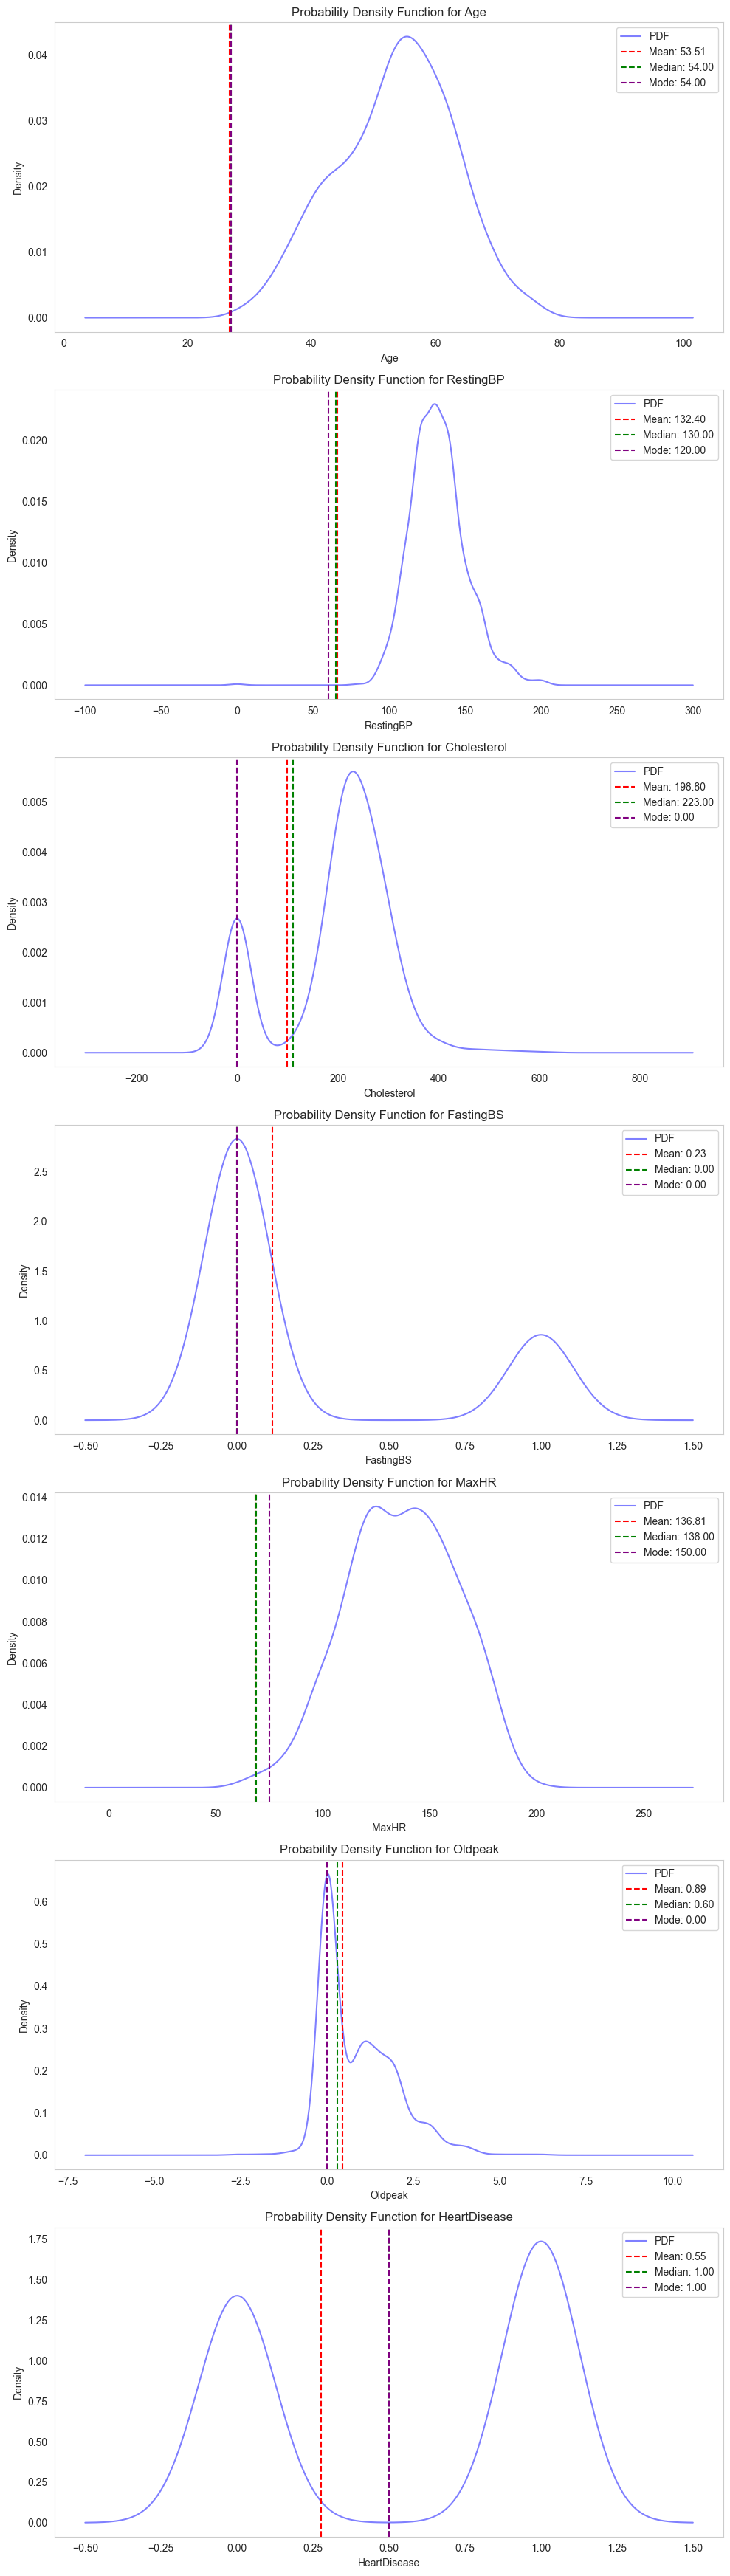

In [394]:
# Setting up the plot
num_features = 7
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 5 * num_features))

# Loop through each feature to create a PDF plot
for i, column in enumerate(heart_failure_kDenisty):
    # Plotting the density
    heart_failure_df[column].plot(kind='density', ax=axes[i], color='blue', alpha=0.5, label='PDF')

    # Calculate mean, median, and mode
    mean = heart_failure_df[column].mean()
    median = heart_failure_df[column].median()
    mode = heart_failure_df[column].mode()[0]

    # Marking mean, median, and mode with horizontal lines
    axes[i].axvline(x=mean / 2, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    axes[i].axvline(x=median / 2, color='green', linestyle='--', label=f'Median: {median:.2f}') 
    axes[i].axvline(x=mode / 2, color='purple', linestyle='--', label=f'Mode: {mode:.2f}')  

    # Adding titles and labels
    axes[i].set_title(f'Probability Density Function for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

1. `Age`: Displays a normal distribution, centered around 53.5 years (mean), with the median and mode close to each other at 54.
2. `RestingBP` (Resting Blood Pressure): Normally distributed around a mean of 132.4, with the median at 130 and mode at 120, indicating slightly skewed data.
3. `Cholesterol`: Skewed distribution with a mean of 198.8, median at 223, and mode at 0, suggesting outliers or invalid values at 0.
4. `FastingBS` (Fasting Blood Sugar): Binary distribution peaking at 0, with the mean value of 0.23 and most data clustered at 0.
5. `MaxHR` (Maximum Heart Rate Achieved): Bell-shaped curve with a mean of 136.8, median at 138, and mode at 150, showing slight symmetry.
6. `Oldpeak`: Skewed towards 0, with a mean of 0.89 and the majority of values around 0, indicating minimal ST depression in most cases.
7. `HeartDisease`: Bimodal distribution representing the target variable, with a mean of 0.55 and higher density at 1, showing more individuals with heart disease.

These visualizations help in understanding the central tendencies, spread, and outliers for each feature, essential for further analysis and preprocessing.

### 3.6 ◆ Displaying skewness of the Numeric Features 

In [395]:
numerical_features = heart_failure_df.select_dtypes(include=np.number).columns
heart_failure_df[numerical_features].skew()

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64


1. `Age` (-0.195933): Slightly negatively skewed, meaning the tail on the left side (younger ages) is slightly longer, but the distribution is nearly symmetric.

2. `RestingBP` (0.179839): Slightly positively skewed, indicating a small tail on the right side (higher blood pressure values).

3. `Cholesterol` (-0.610086): Moderately negatively skewed, suggesting more data points on the higher side, with a longer tail on the lower end (some outliers or extreme low values).

4. `FastingBS` (1.264484): Highly positively skewed, indicating a significant tail on the right side (more extreme higher values for fasting blood sugar).

5. `MaxHR` (-0.144359): Slightly negatively skewed, with the distribution fairly symmetric and a minor left-side tail (lower maximum heart rate values).

6. `Oldpeak` (1.022872): Strongly positively skewed, meaning more data is clustered near zero, and there’s a longer tail on the higher side (ST depression values).

7. `HeartDisease` (-0.215086): Slightly negatively skewed, but since it is binary, the skewness value here reflects the imbalance between the two classes (more individuals with heart disease).

   Key Insights:
- Features like **FastingBS** and **Oldpeak** have significant positive skewness, suggesting potential transformations may be needed to normalize the data.
- Other features are only slightly skewed, meaning they are relatively symmetric and may not require transformations.

### 3. 7 ◆ Show the Correlation between Numeric Features

In [396]:
correlation_matrix=heart_failure_df.corr(numeric_only=True)
correlation_matrix

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


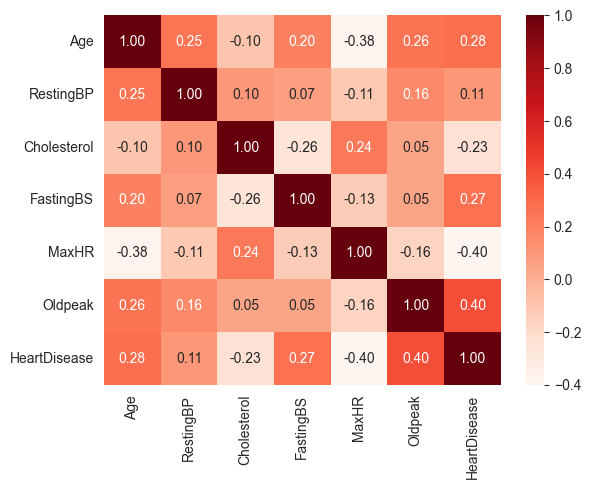

In [397]:
sns.heatmap(correlation_matrix, cmap='Reds', annot=True, fmt='.2f')

plt.show()

The correlation matrix highlights key relationships:

- `Age`: Positively correlated with `RestingBP` (0.25) and `HeartDisease` (0.28); negatively with `MaxHR` (-0.38).
- `RestingBP`: Weak correlations with other features.
- `Cholesterol`: Negatively correlated with `HeartDisease` (-0.23).
- `FastingBS`: Positively correlated with `HeartDisease` (0.27).
- `MaxHR`: Strongly negatively correlated with `HeartDisease` (-0.40).
- `Oldpeak`: Strongly positively correlated with `HeartDisease` (0.40).

### Key Predictors:
- `Oldpeak`, `MaxHR`, `FastingBS`, and `Age` are the most relevant for predicting heart disease.

## 4. Data cleaning and processing:


### 4.1 ◆ Analyzing Features

In [398]:
def analyze_feature(df, feature_name):
    print(f"Values Counts of feautre {feature_name} :")
    print(df[feature_name].value_counts().sort_index())
    print(f"Unique Values of feautre{feature_name} :")
    print(df[feature_name].unique().tolist())
    null_entries = df[feature_name].isnull().sum()
    non_null_entries = df[feature_name].value_counts().sort_index().sum()
    print(f"Sum of the non-null entries for '{feature_name}': {non_null_entries}")
    print(f"Sum of the null entries for '{feature_name}': {null_entries}")
    print(f"Sum of the non-null entries and null entries for '{feature_name}': {non_null_entries + null_entries}") 
    print(f"Data type for '{feature_name}': {df[feature_name].dtype}")



In [399]:
analyze_feature(heart_failure_df,'Age')

Values Counts of feautre Age :
Age
28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: count, dtype: int64
Unique Values of feautreAge :
[40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51, 56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61, 29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71]
Sum of the non-null entries for 'Age': 918
Sum of the null entries for 'Age': 0
Sum of the non-null entries and null entries for 'Age': 918
Data type for 'Age': int64


In [400]:
analyze_feature(heart_failure_df,'Sex')

Values Counts of feautre Sex :
Sex
F    193
M    725
Name: count, dtype: int64
Unique Values of feautreSex :
['M', 'F']
Sum of the non-null entries for 'Sex': 918
Sum of the null entries for 'Sex': 0
Sum of the non-null entries and null entries for 'Sex': 918
Data type for 'Sex': object


In [401]:
analyze_feature(heart_failure_df,'ChestPainType')

Values Counts of feautre ChestPainType :
ChestPainType
ASY    496
ATA    173
NAP    203
TA      46
Name: count, dtype: int64
Unique Values of feautreChestPainType :
['ATA', 'NAP', 'ASY', 'TA']
Sum of the non-null entries for 'ChestPainType': 918
Sum of the null entries for 'ChestPainType': 0
Sum of the non-null entries and null entries for 'ChestPainType': 918
Data type for 'ChestPainType': object


In [402]:
analyze_feature(heart_failure_df,'RestingBP')

Values Counts of feautre RestingBP :
RestingBP
0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: count, Length: 67, dtype: int64
Unique Values of feautreRestingBP :
[140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125, 145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106, 92, 200, 122, 98, 105, 133, 95, 80, 137, 185, 165, 126, 152, 116, 0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123, 102, 96, 143, 172, 156, 114, 127, 101, 174, 94, 148, 117, 192, 129, 164]
Sum of the non-null entries for 'RestingBP': 918
Sum of the null entries for 'RestingBP': 0
Sum of the non-null entries and null entries for 'RestingBP': 918
Data type for 'RestingBP': int64


In [403]:
analyze_feature(heart_failure_df,'Cholesterol')

Values Counts of feautre Cholesterol :
Cholesterol
0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: count, Length: 222, dtype: int64
Unique Values of feautreCholesterol :
[289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204, 234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468, 188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294, 264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365, 342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163, 529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147, 85, 269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156, 272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279, 198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320, 187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219, 257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309, 200, 336, 355, 326, 171, 491, 271, 2

In [404]:
analyze_feature(heart_failure_df,'FastingBS')

Values Counts of feautre FastingBS :
FastingBS
0    704
1    214
Name: count, dtype: int64
Unique Values of feautreFastingBS :
[0, 1]
Sum of the non-null entries for 'FastingBS': 918
Sum of the null entries for 'FastingBS': 0
Sum of the non-null entries and null entries for 'FastingBS': 918
Data type for 'FastingBS': int64


In [405]:
analyze_feature(heart_failure_df,'RestingECG')

Values Counts of feautre RestingECG :
RestingECG
LVH       188
Normal    552
ST        178
Name: count, dtype: int64
Unique Values of feautreRestingECG :
['Normal', 'ST', 'LVH']
Sum of the non-null entries for 'RestingECG': 918
Sum of the null entries for 'RestingECG': 0
Sum of the non-null entries and null entries for 'RestingECG': 918
Data type for 'RestingECG': object


In [406]:
analyze_feature(heart_failure_df,'MaxHR')

Values Counts of feautre MaxHR :
MaxHR
60     1
63     1
67     1
69     1
70     1
      ..
190    2
192    1
194    1
195    1
202    1
Name: count, Length: 119, dtype: int64
Unique Values of feautreMaxHR :
[172, 156, 98, 108, 122, 170, 142, 130, 120, 99, 145, 140, 137, 150, 166, 165, 125, 160, 164, 138, 178, 112, 118, 127, 114, 154, 155, 87, 148, 100, 168, 184, 121, 153, 134, 96, 174, 175, 144, 82, 135, 115, 128, 116, 94, 110, 92, 180, 152, 124, 106, 185, 139, 190, 146, 158, 132, 176, 119, 188, 162, 105, 90, 136, 167, 129, 102, 143, 103, 91, 126, 93, 131, 149, 123, 182, 141, 77, 109, 133, 179, 113, 104, 95, 72, 97, 117, 86, 63, 157, 83, 60, 70, 163, 67, 78, 84, 111, 80, 107, 161, 69, 88, 73, 159, 151, 181, 186, 177, 173, 169, 171, 147, 71, 192, 195, 194, 187, 202]
Sum of the non-null entries for 'MaxHR': 918
Sum of the null entries for 'MaxHR': 0
Sum of the non-null entries and null entries for 'MaxHR': 918
Data type for 'MaxHR': int64


In [407]:
analyze_feature(heart_failure_df,'ExerciseAngina')

Values Counts of feautre ExerciseAngina :
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
Unique Values of feautreExerciseAngina :
['N', 'Y']
Sum of the non-null entries for 'ExerciseAngina': 918
Sum of the null entries for 'ExerciseAngina': 0
Sum of the non-null entries and null entries for 'ExerciseAngina': 918
Data type for 'ExerciseAngina': object


In [408]:
analyze_feature(heart_failure_df,'Oldpeak')

Values Counts of feautre Oldpeak :
Oldpeak
-2.6      1
-2.0      1
-1.5      1
-1.1      1
-1.0      2
-0.9      1
-0.8      1
-0.7      1
-0.5      2
-0.1      2
 0.0    368
 0.1     14
 0.2     22
 0.3     11
 0.4     11
 0.5     19
 0.6     14
 0.7      7
 0.8     16
 0.9      4
 1.0     86
 1.1      7
 1.2     26
 1.3      7
 1.4     18
 1.5     53
 1.6     16
 1.7      6
 1.8     17
 1.9      7
 2.0     76
 2.1      2
 2.2      5
 2.3      2
 2.4      4
 2.5     16
 2.6      7
 2.8      7
 2.9      1
 3.0     28
 3.1      1
 3.2      2
 3.4      3
 3.5      2
 3.6      4
 3.7      1
 3.8      1
 4.0      8
 4.2      2
 4.4      1
 5.0      1
 5.6      1
 6.2      1
Name: count, dtype: int64
Unique Values of feautreOldpeak :
[0.0, 1.0, 1.5, 2.0, 3.0, 4.0, 0.5, 2.5, 5.0, 0.8, 0.7, 1.4, 2.1, 0.4, 0.2, 1.7, 2.2, 0.1, 1.6, 1.3, 0.3, 1.8, 2.6, -0.9, 2.8, -2.6, -1.5, -0.1, 0.9, 1.1, 2.4, -1.0, -1.1, -0.7, -0.8, 3.7, 1.2, -0.5, -2.0, 1.9, 3.5, 0.6, 3.1, 2.3, 3.4, 3.6, 4.2, 3.2, 5.6, 3.8, 

In [409]:
analyze_feature(heart_failure_df,'ST_Slope')

Values Counts of feautre ST_Slope :
ST_Slope
Down     63
Flat    460
Up      395
Name: count, dtype: int64
Unique Values of feautreST_Slope :
['Up', 'Flat', 'Down']
Sum of the non-null entries for 'ST_Slope': 918
Sum of the null entries for 'ST_Slope': 0
Sum of the non-null entries and null entries for 'ST_Slope': 918
Data type for 'ST_Slope': object


In [410]:
analyze_feature(heart_failure_df,'HeartDisease')

Values Counts of feautre HeartDisease :
HeartDisease
0    410
1    508
Name: count, dtype: int64
Unique Values of feautreHeartDisease :
[0, 1]
Sum of the non-null entries for 'HeartDisease': 918
Sum of the null entries for 'HeartDisease': 0
Sum of the non-null entries and null entries for 'HeartDisease': 918
Data type for 'HeartDisease': int64


### 4.2 ◆ Handling missing values


#### 4.2.1 Observe number of null entries and percentage - isunll()

In [411]:
heart_failure_df.isnull().mean()*100


Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

##### Here we can see that all features do not have any missing values , No need for imputations

### 4.3 ◆ Smoothing and deal with duplicates



#### 4.3.1 Detecting Duplicates

In [412]:
duplicates_df = heart_failure_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_df}")

Number of duplicate rows: 0


We can see that there are no duplicated rows in the dataset ,
No need to Handle the Duplicates

### 4.4 ◆ Deal with Outliers




#### 4.4.1 Detecting Outliers

Plotting Histograms and KDE for Numeric Features 

In [413]:
numeric_columns = heart_failure_df.select_dtypes(include=['number'])


In [414]:

def plot_histogram_kde_distirbution(df, numeric_features, figsize=(24, 24), bins=30, title="Histograms and KDE for Numeric Features"):

    sns.set_style('whitegrid') 
    plt.figure(figsize=figsize)  
    for i, col in enumerate(numeric_features.columns, 1):
        plt.subplot(4, 3, i)  
        sns.histplot(df[col], kde=True, color='blue', edgecolor='black', bins=bins)
        plt.title(f'Distribution of {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
    plt.tight_layout(pad=3.0)
    plt.suptitle(title, fontsize=20, y=1.02)
    plt.show()


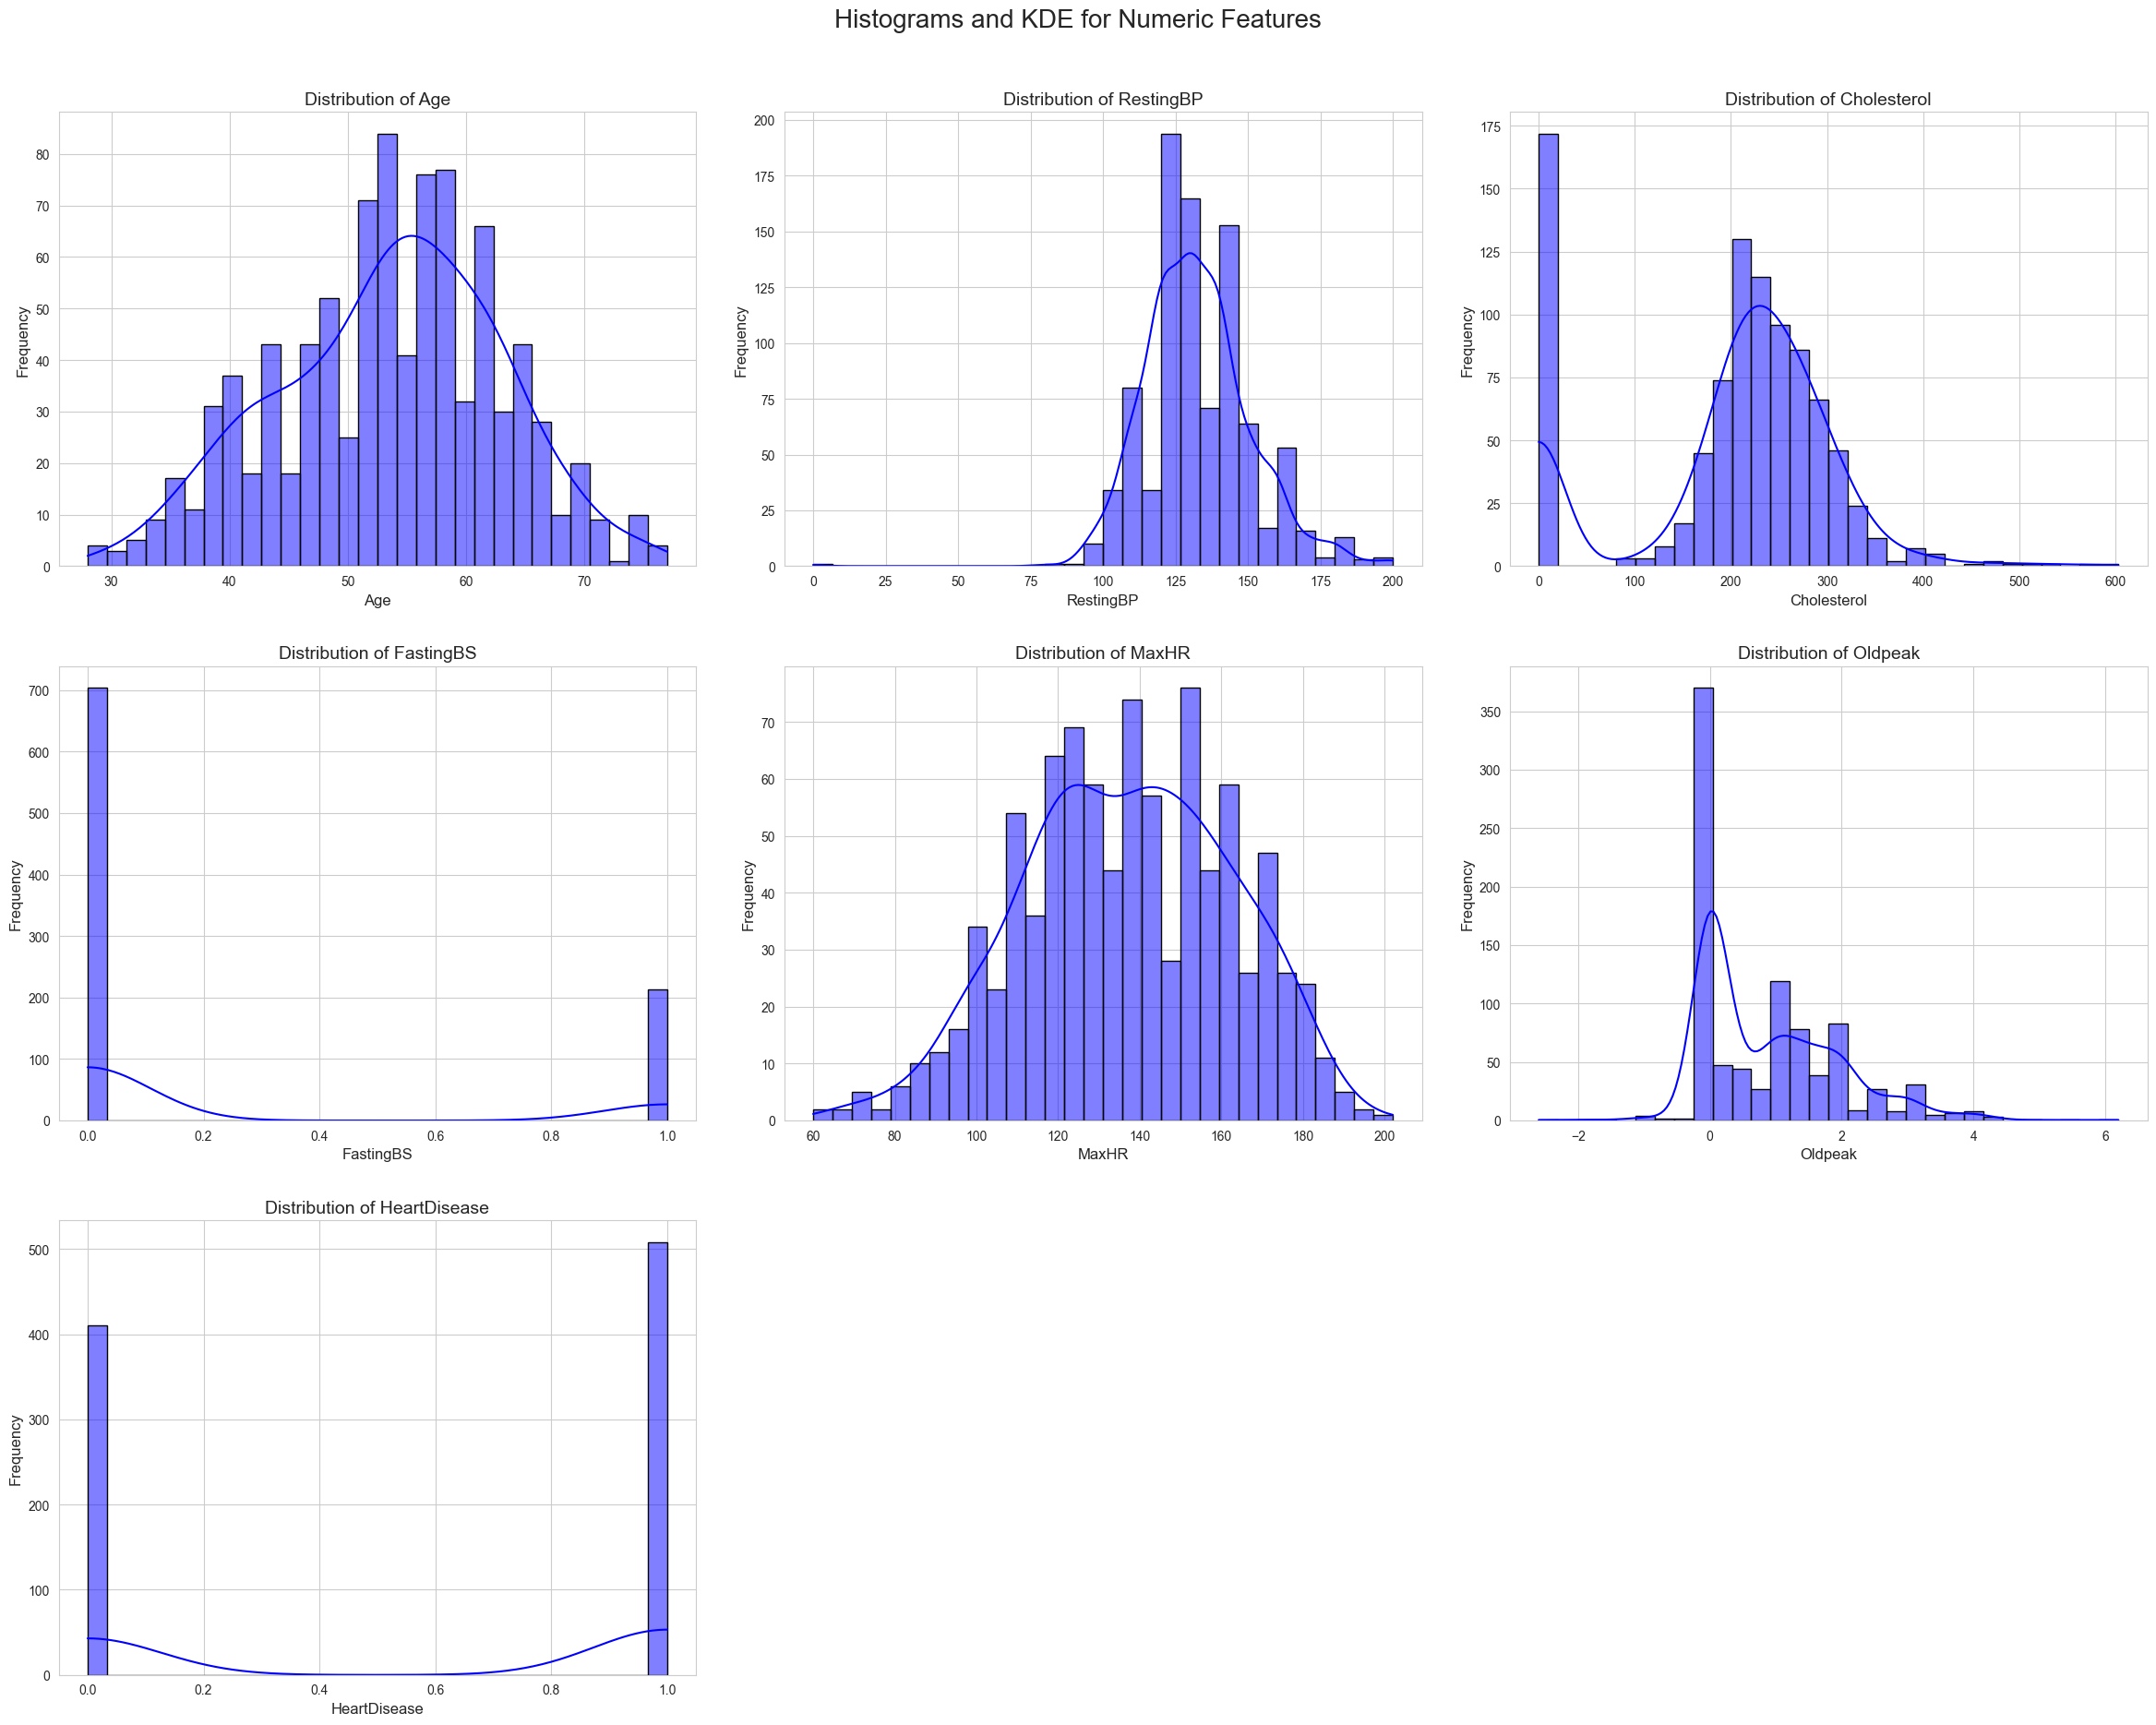

In [415]:
plot_histogram_kde_distirbution(heart_failure_df,numeric_columns)

In [416]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 -1.5*IQR
    upper_bound = Q3 + 1.5 *IQR
    outlier_mask = (df[column] <lower_bound)|(df[column]>upper_bound)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.axvline(lower_bound, color='r', linestyle='--', label=f'Lower Bound:{lower_bound:.2f}')
    plt.axvline(upper_bound, color='g', linestyle='--', label=f'Upper Bound:{upper_bound:.2f}')
    plt.title(f'Box Plot for {column} with Outlier Bounds')
    plt.legend()
    plt.show()
    print(f'Outlier detection for {column}:')
    print(f'Lower bound: {lower_bound}, Upper bound: {upper_bound}')
    print(f'Number of outliers detected: {len(outlier_mask[outlier_mask])} ({len(outlier_mask[outlier_mask]) / len(df) * 100:.3f}%)')

    return lower_bound, upper_bound, outlier_mask

Outlier detection depends on the distribution and characteristics of each feature. 
### 1. `Age`:
   - Method: Z-Score or IQR (Interquartile Range) Method
   - Reason: The distribution is approximately normal. Z-Score is effective for identifying values beyond a specific standard deviation, while IQR works well for robust detection.

### 2. `RestingBP`:
   - Method: IQR Method
   - Reason: Slightly skewed but not heavily; the IQR method will effectively detect values outside the typical range.

### 3. `Cholesterol`:
   - Method: IQR Method
   - Reason: Positively skewed with some extreme outliers. IQR can handle skewness better than Z-Score.

### 4. `FastingBS` :
   - Method: Outlier detection is not relevant 
   - Reason: Binary distribution (0 or 1). Outlier detection is less relevant but could identify anomalies if extreme values occur.

### 5. `MaxHR` :
   - Method: Z-Score or IQR Method
   - Reason: Approximately normal distribution. Both Z-Score and IQR are suitable for detecting outliers in heart rate.

### 6. `Oldpeak`:
   - Method: IQR Method
   - Reason: Positively skewed with clear outliers. IQR is more robust to skewness and is effective here.

### 7. `HeartDisease`:
   - Method: Not applicable for outlier detection
   - Reason: Binary classification (0 or 1); no numerical outliers are possible.


### Detecting Outliers using IQR Method

In [417]:
outlier_numeric_features  = heart_failure_df.loc[:,['Age','RestingBP','Cholesterol', 'MaxHR', 'Oldpeak']]


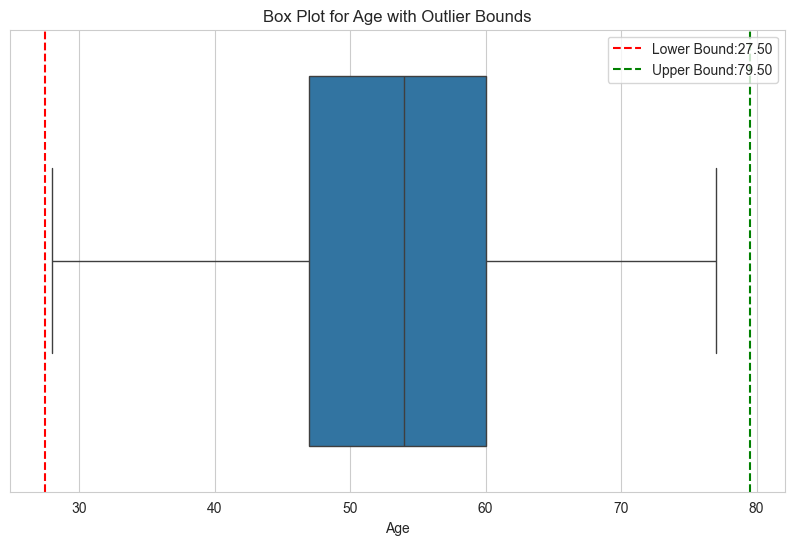

Outlier detection for Age:
Lower bound: 27.5, Upper bound: 79.5
Number of outliers detected: 0 (0.000%)


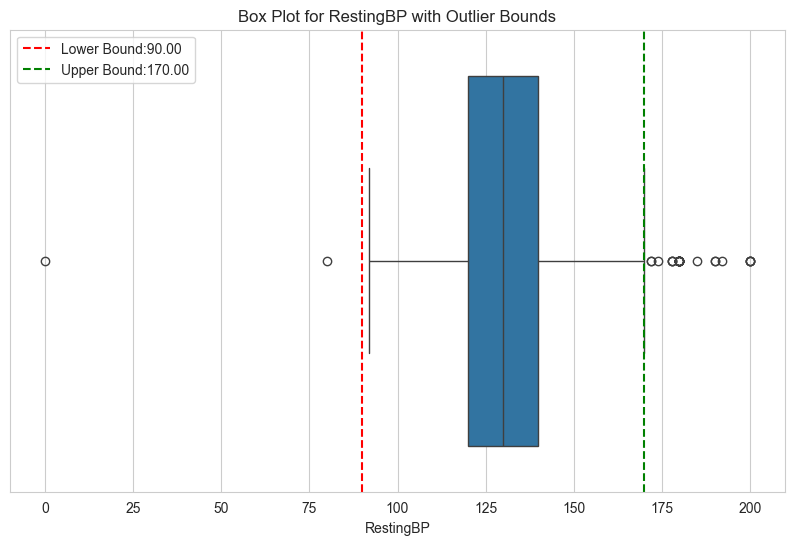

Outlier detection for RestingBP:
Lower bound: 90.0, Upper bound: 170.0
Number of outliers detected: 28 (3.050%)


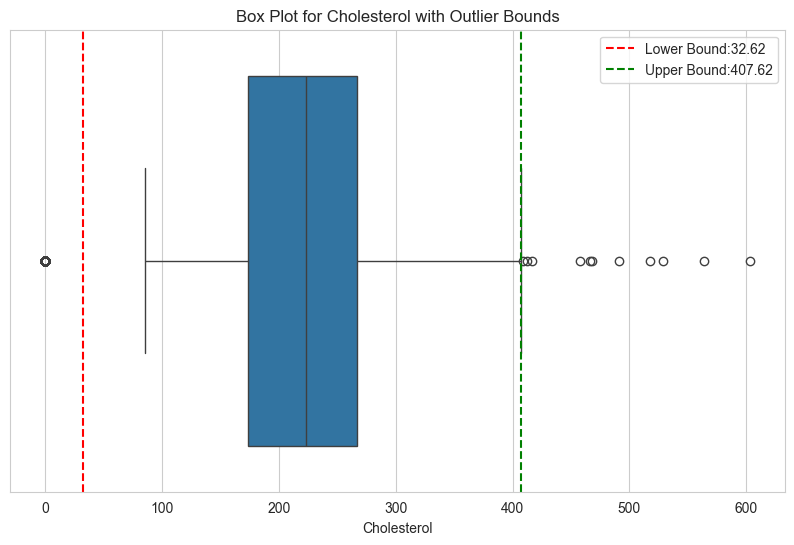

Outlier detection for Cholesterol:
Lower bound: 32.625, Upper bound: 407.625
Number of outliers detected: 183 (19.935%)


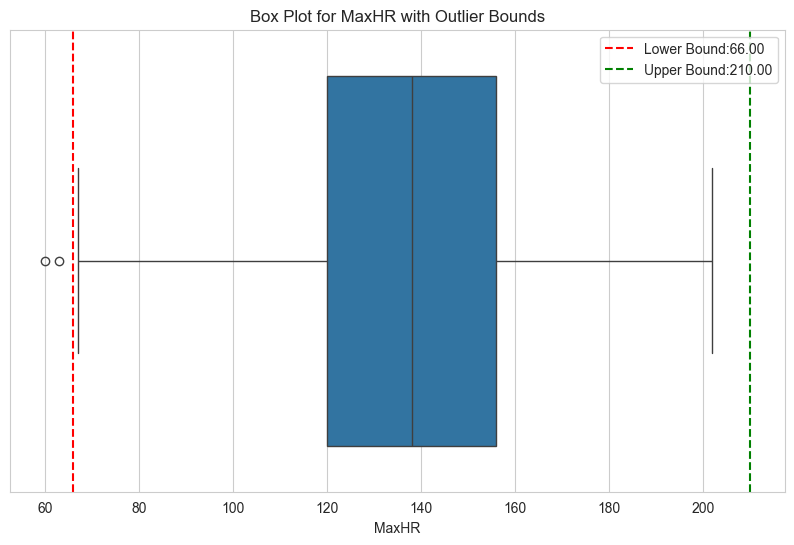

Outlier detection for MaxHR:
Lower bound: 66.0, Upper bound: 210.0
Number of outliers detected: 2 (0.218%)


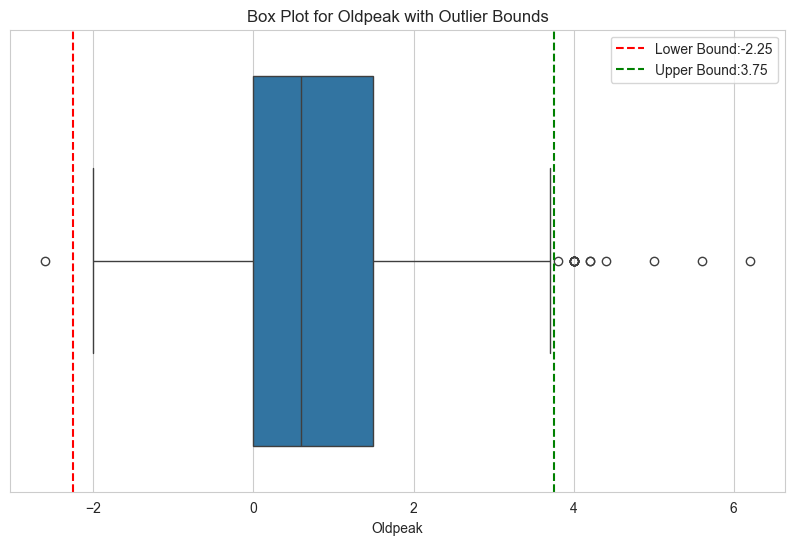

Outlier detection for Oldpeak:
Lower bound: -2.25, Upper bound: 3.75
Number of outliers detected: 16 (1.743%)


In [418]:
for col in outlier_numeric_features :
    detect_outliers_iqr(heart_failure_df,col)

Age               Axes(0.125,0.747241;0.227941x0.132759)
RestingBP      Axes(0.398529,0.747241;0.227941x0.132759)
Cholesterol    Axes(0.672059,0.747241;0.227941x0.132759)
MaxHR             Axes(0.125,0.587931;0.227941x0.132759)
Oldpeak        Axes(0.398529,0.587931;0.227941x0.132759)
dtype: object

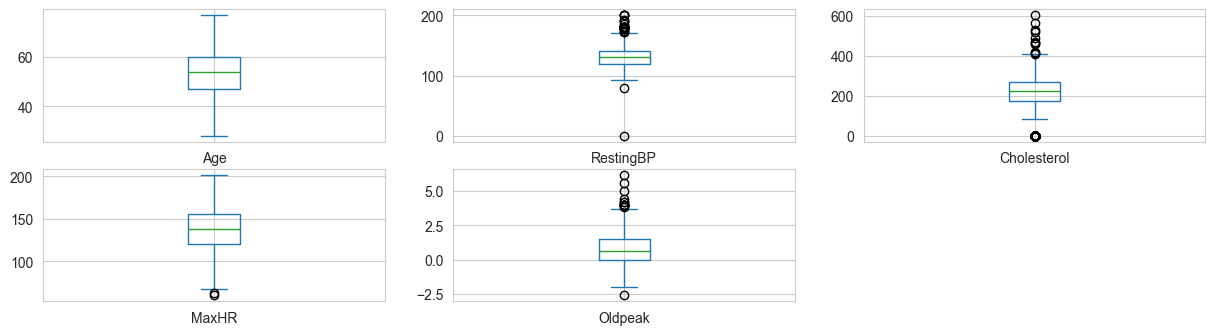

In [419]:
outlier_numeric_features.plot(kind='box', subplots=True, sharex=False, sharey=False, layout=(5,3), figsize=(15,10)) 

Detecting Outliers for `Age` and `MaxHR` using z-score

In [420]:
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    outlier_mask = np.abs(z_scores) > threshold
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Z-Score Distribution for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    print(f'Outlier detection for {column}:')
    print(f'Number of outliers detected: {outlier_mask.sum()} ({outlier_mask.sum() / len(df) * 100:.3f}%)')

    return outlier_mask

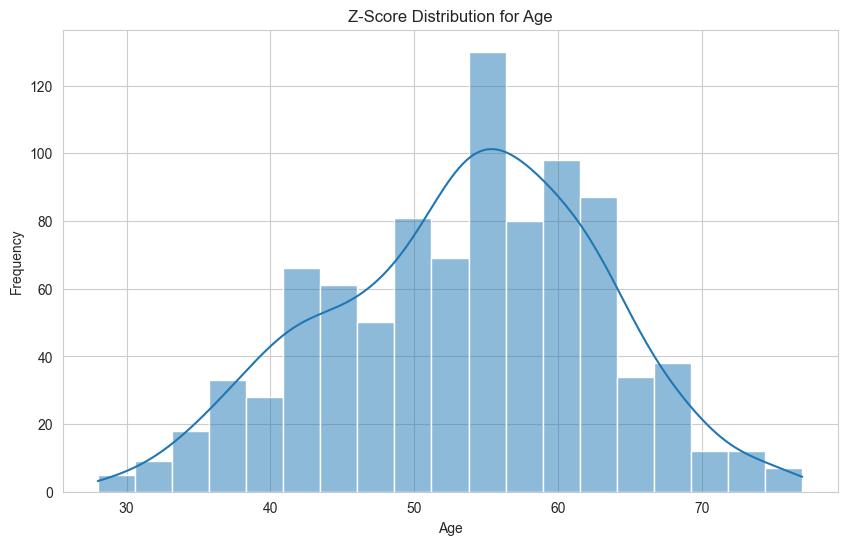

Outlier detection for Age:
Number of outliers detected: 0 (0.000%)


In [421]:
outlier_mask_age = detect_outliers_zscore(heart_failure_df, 'Age')

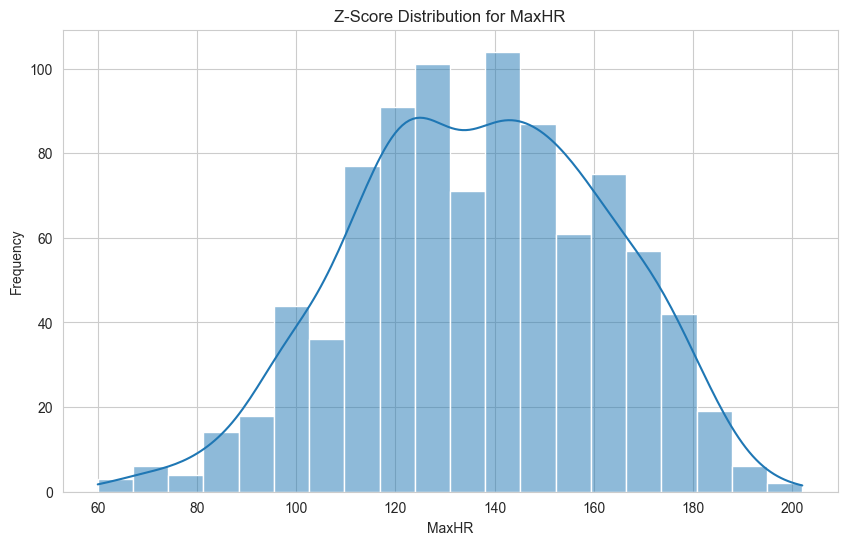

Outlier detection for MaxHR:
Number of outliers detected: 1 (0.109%)


In [422]:
zscore_outlier_mask_maxHR = detect_outliers_zscore(heart_failure_df, 'MaxHR')

### After Detecting the Outliers :
1. `Age` : Has no outliers .
2. `MaxHR` : Has two outliers detected using IQR method but only one outlier using z-score method 
3. Outlier detection for `RestingBP `:
Lower bound: 90.0, Upper bound: 170.0
Number of outliers detected: 28 (3.050%)
4. Outlier detection for `Cholesterol`:
Lower bound: 32.625, Upper bound: 407.625
Number of outliers detected: 183 (19.935%)
5. Outlier detection for `Oldpeak`:
Lower bound: -2.25, Upper bound: 3.75
Number of outliers detected: 16 (1.743%)



#### 4.4.2 Handling Outliers

Function for plotting IQR :

In [423]:
def plot_iqr_boxplot(df, original_column, capped_column):
    Q1 = df[original_column].quantile(0.25)
    Q3 = df[original_column].quantile(0.75)
    IQR = Q3 - Q1
    upper_threshold = Q3 + 1.5 * IQR
    lower_threshold = Q1 - 1.5 * IQR
    original_outliers = ((df[original_column] > upper_threshold) | (df[original_column] < lower_threshold)).sum()
    original_outlier_percent = (original_outliers / len(df)) * 100

    capped_outliers = ((df[capped_column] > upper_threshold) | (df[capped_column] < lower_threshold)).sum()
    capped_outlier_percent = (capped_outliers / len(df)) * 100

    print(f'Original outliers in {original_column}: {original_outliers} ({original_outlier_percent:.2f}%)')
    print(f'Outliers after capping in {capped_column}: {capped_outliers} ({capped_outlier_percent:.2f}%)')
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    sns.boxplot(y=df[original_column], ax=ax[0])
    ax[0].set_title(f'IQR Box Plot for {original_column} Before Capping')
    ax[0].set_ylabel(original_column)

    sns.boxplot(y=df[capped_column], ax=ax[1])
    ax[1].set_title(f'IQR Box Plot for {capped_column} After Capping')
    ax[1].set_ylabel(capped_column)

    plt.tight_layout()
    plt.show()


Function for Plotting Original Vs Transformed KDE Histogram for each feature :

In [424]:
def plot_original_vs_transformed_kde_hist(df, column_name, transformed_column_name):
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))

    sns.histplot(df[column_name], ax=ax[0], kde=True)
    ax[0].set_title(f'Original {column_name} Distribution')
    ax[0].set_xlabel(column_name)
    ax[0].set_ylabel('Frequency')

    sns.histplot(df[transformed_column_name], ax=ax[1], kde=True)
    ax[1].set_title(f'Transformed {column_name} Distribution')
    ax[1].set_xlabel(transformed_column_name)
    ax[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

Function for applying SQRT Transformation :

In [425]:

def handling_outliers_sqrt_transformation(df, column_name):
    
    new_column_name = f"{column_name}_sqrt_transformation"
    df[new_column_name] = np.sqrt(df[column_name])
    return df

Function for applying Log Transformation :

In [426]:
def handling_outliers_log_transformation(df, column_name):

    new_column_name = f"{column_name}_log_transformation"
    df[new_column_name] = np.log1p(df[column_name])

    return df

Function for Capping Outliers IQR :

In [427]:
def cap_outliers_iqr(df, column, new_column_name, iqr_factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_threshold = Q3 + iqr_factor * IQR
    lower_threshold = Q1 - iqr_factor * IQR
    df[new_column_name] = np.where(df[column] > upper_threshold, upper_threshold, df[column])
    df[new_column_name] = np.where(df[new_column_name] < lower_threshold, lower_threshold, df[new_column_name])
    return df

1. `MaxHR` Capping

In [428]:
heart_failure_df = cap_outliers_iqr(heart_failure_df, 'MaxHR', 'MaxHR_Capped')

Original outliers in MaxHR: 2 (0.22%)
Outliers after capping in MaxHR_Capped: 0 (0.00%)


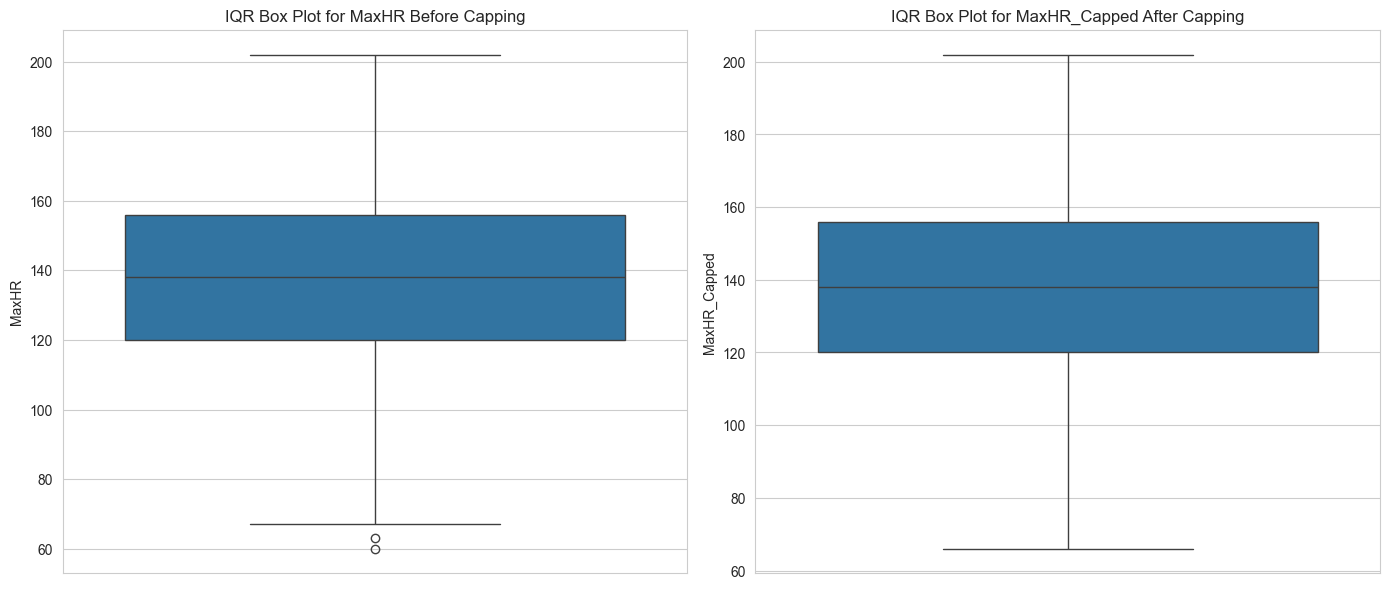

In [429]:
plot_iqr_boxplot(heart_failure_df,'MaxHR','MaxHR_Capped')

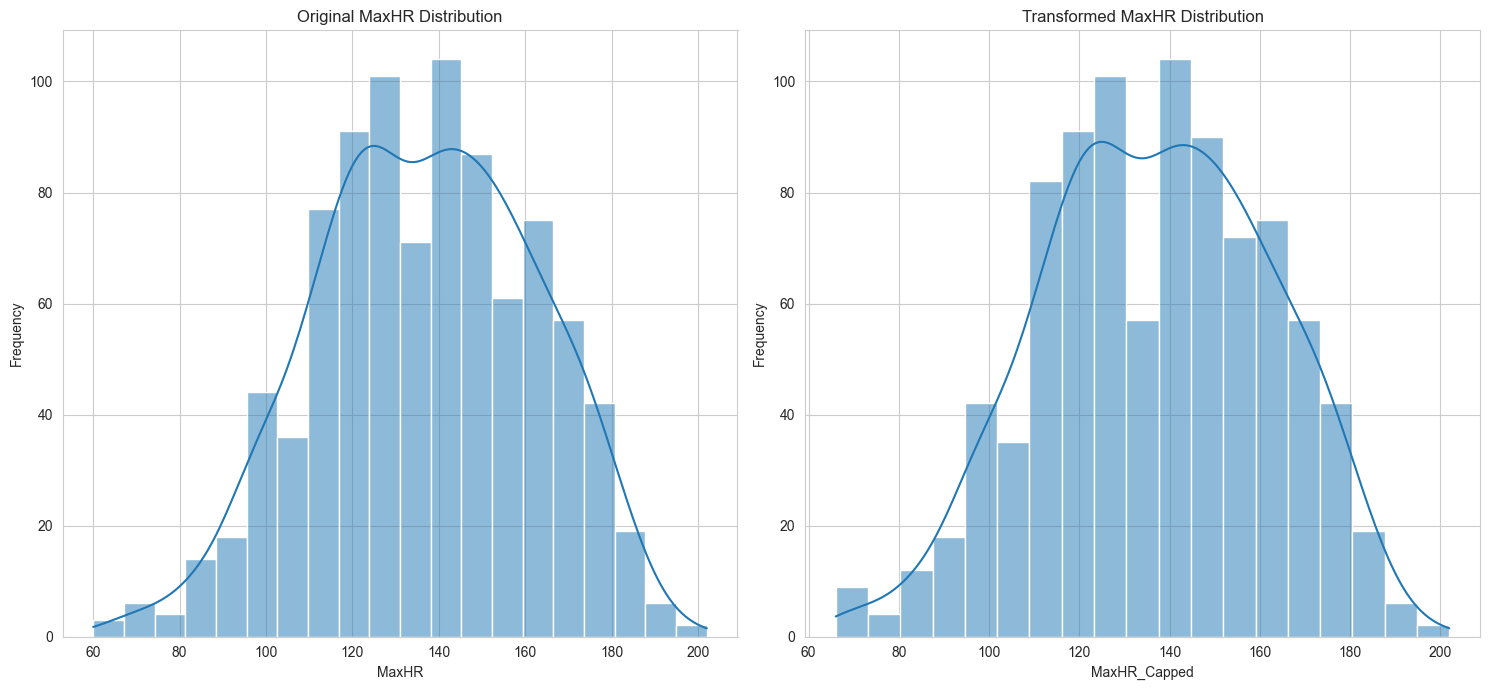

In [430]:
plot_original_vs_transformed_kde_hist(heart_failure_df,'MaxHR', 'MaxHR_Capped')

2. `RestingBP` Capping

In [431]:
heart_failure_df = cap_outliers_iqr(heart_failure_df, 'RestingBP', 'RestingBP_Capped')

Original outliers in RestingBP: 28 (3.05%)
Outliers after capping in RestingBP_Capped: 0 (0.00%)


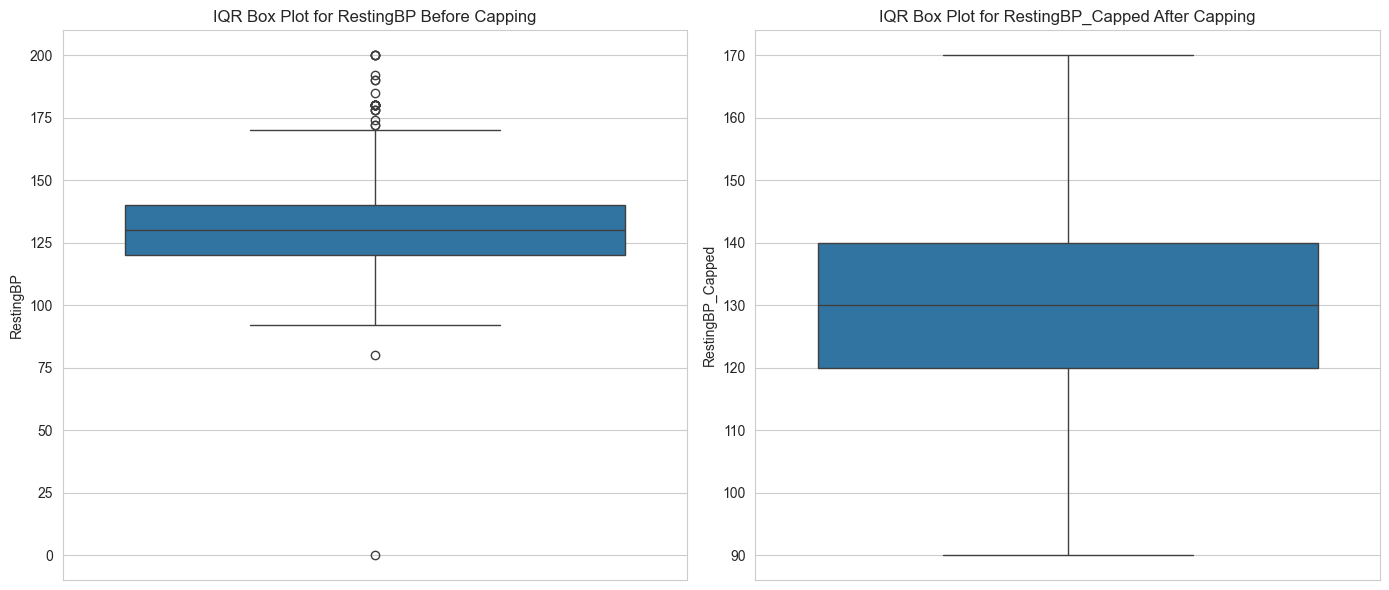

In [432]:
plot_iqr_boxplot(heart_failure_df,'RestingBP', 'RestingBP_Capped')

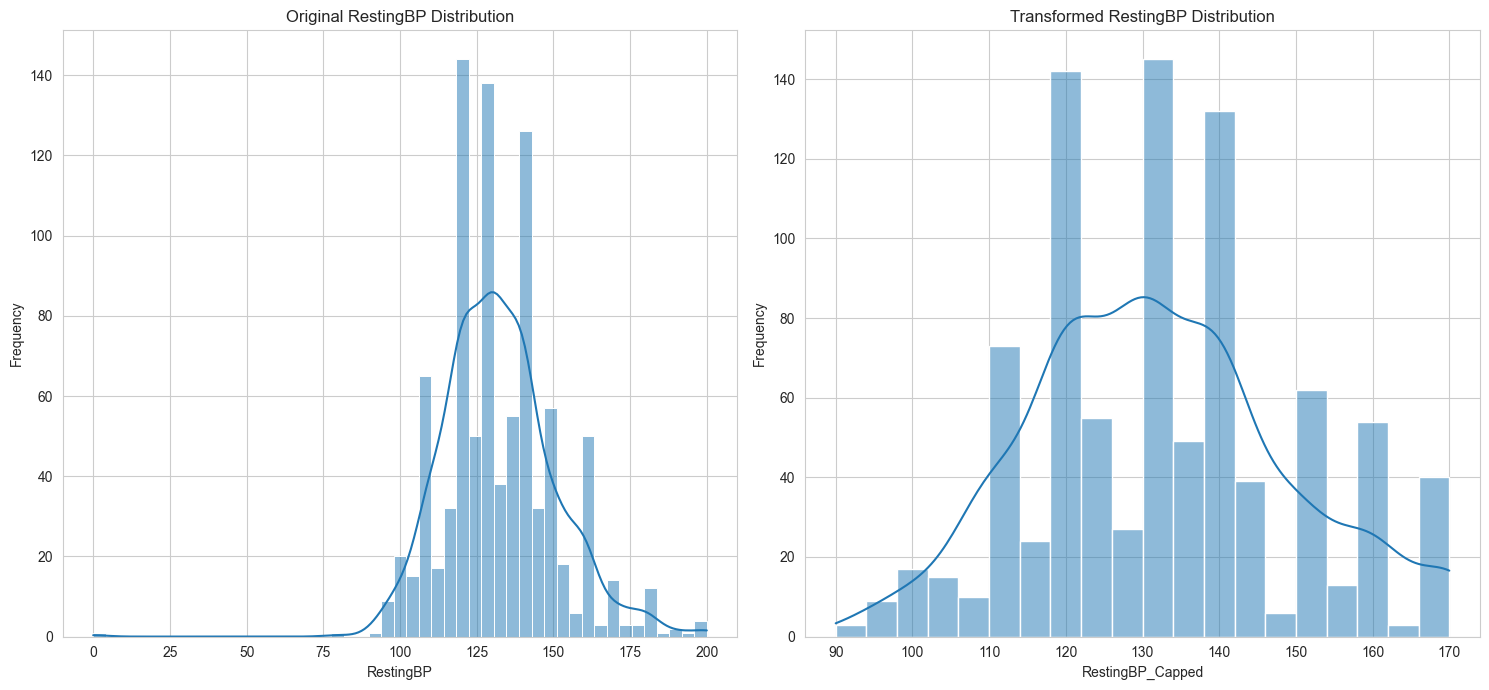

In [433]:
plot_original_vs_transformed_kde_hist(heart_failure_df,'RestingBP', 'RestingBP_Capped')

3. `Oldpeak` Capping

In [434]:
heart_failure_df = cap_outliers_iqr(heart_failure_df, 'Oldpeak', 'Oldpeak_Capped')

Original outliers in Oldpeak: 16 (1.74%)
Outliers after capping in Oldpeak_Capped: 0 (0.00%)


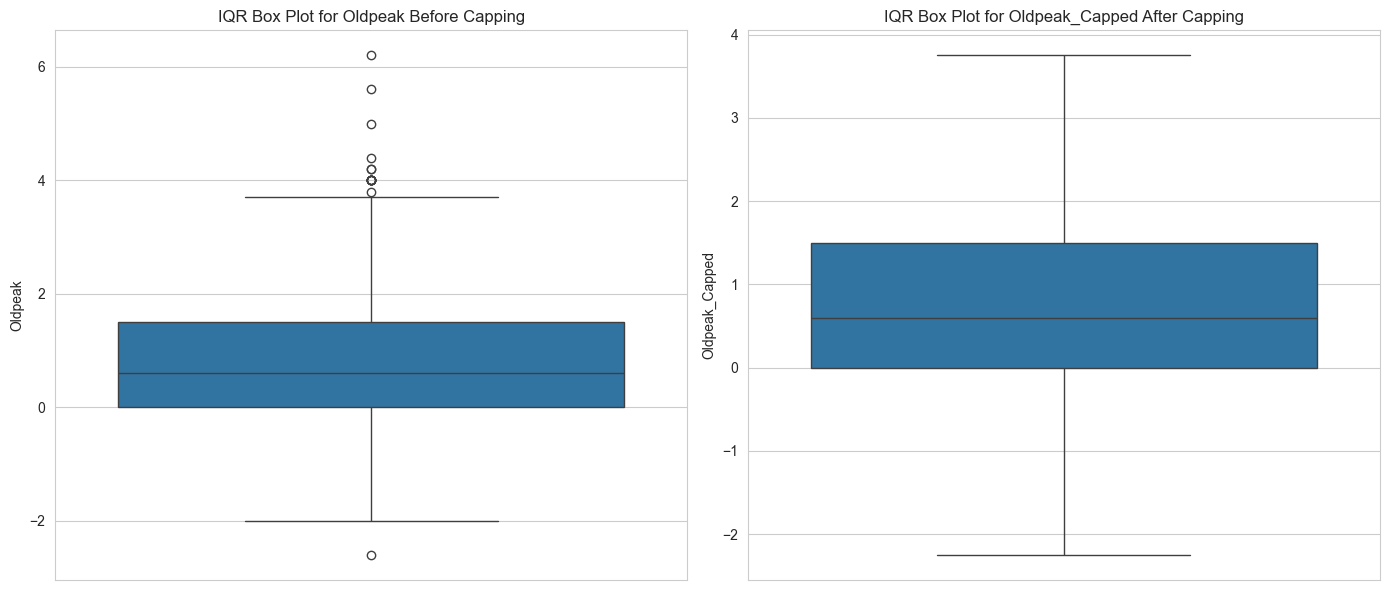

In [435]:
plot_iqr_boxplot(heart_failure_df,'Oldpeak', 'Oldpeak_Capped')

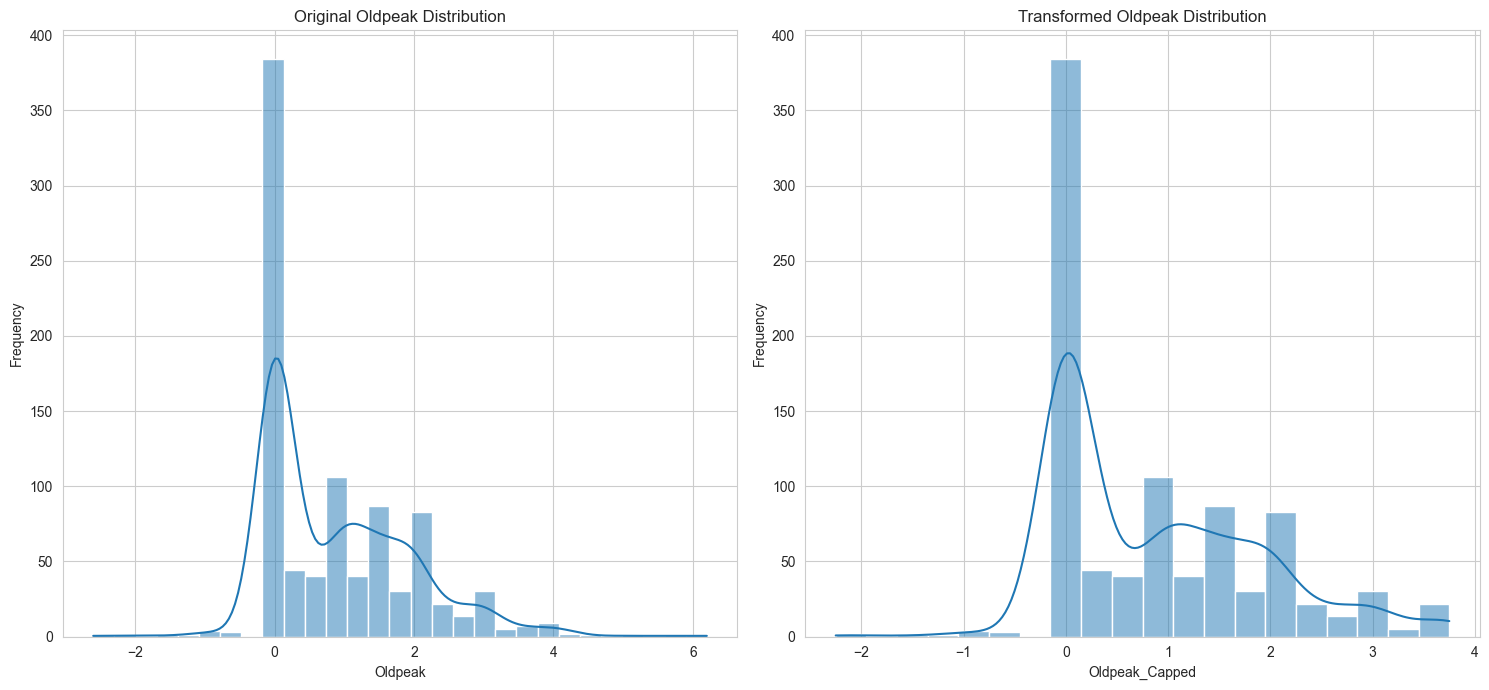

In [436]:
plot_original_vs_transformed_kde_hist(heart_failure_df,'Oldpeak', 'Oldpeak_Capped')

4.`Cholesterol`:
Since Number of outliers detected: 183 (19.935%) ,so using capping direclty will effect on the feature values disturbution , so need for standardization or transformation in order to adjust the values

In [437]:
heart_failure_df = cap_outliers_iqr(heart_failure_df, 'Cholesterol', 'Cholesterol_Capped')

Original outliers in Cholesterol: 183 (19.93%)
Outliers after capping in Cholesterol_Capped: 0 (0.00%)


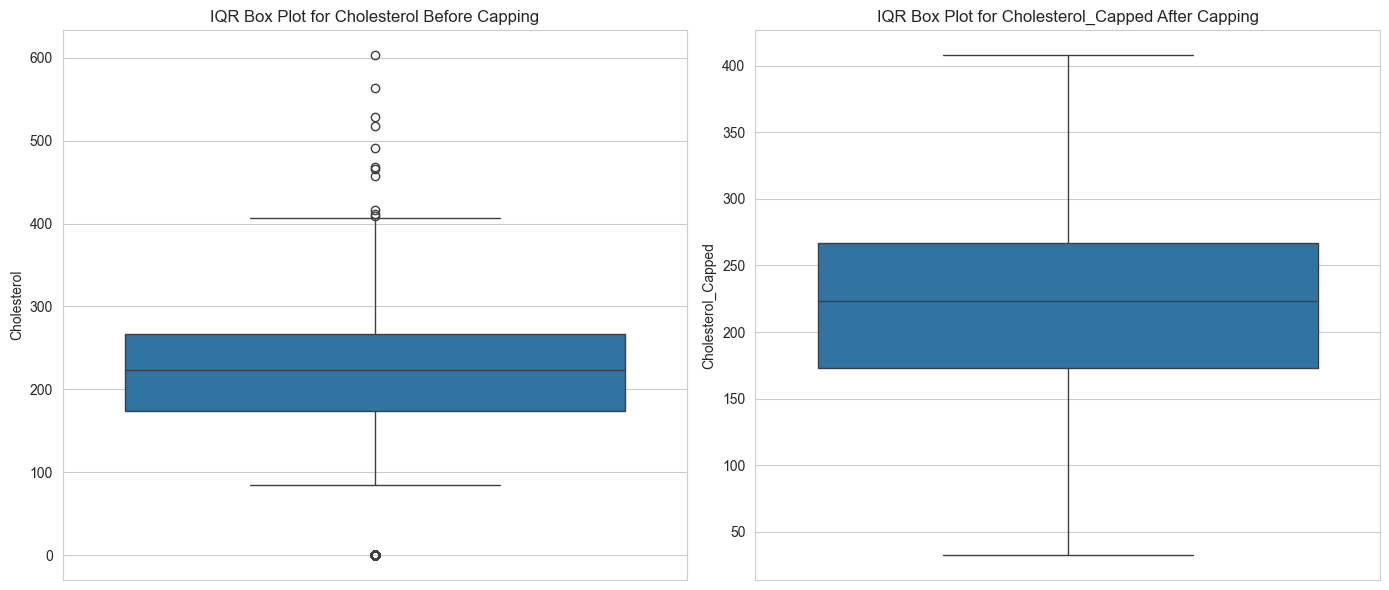

In [438]:
plot_iqr_boxplot(heart_failure_df,'Cholesterol', 'Cholesterol_Capped')

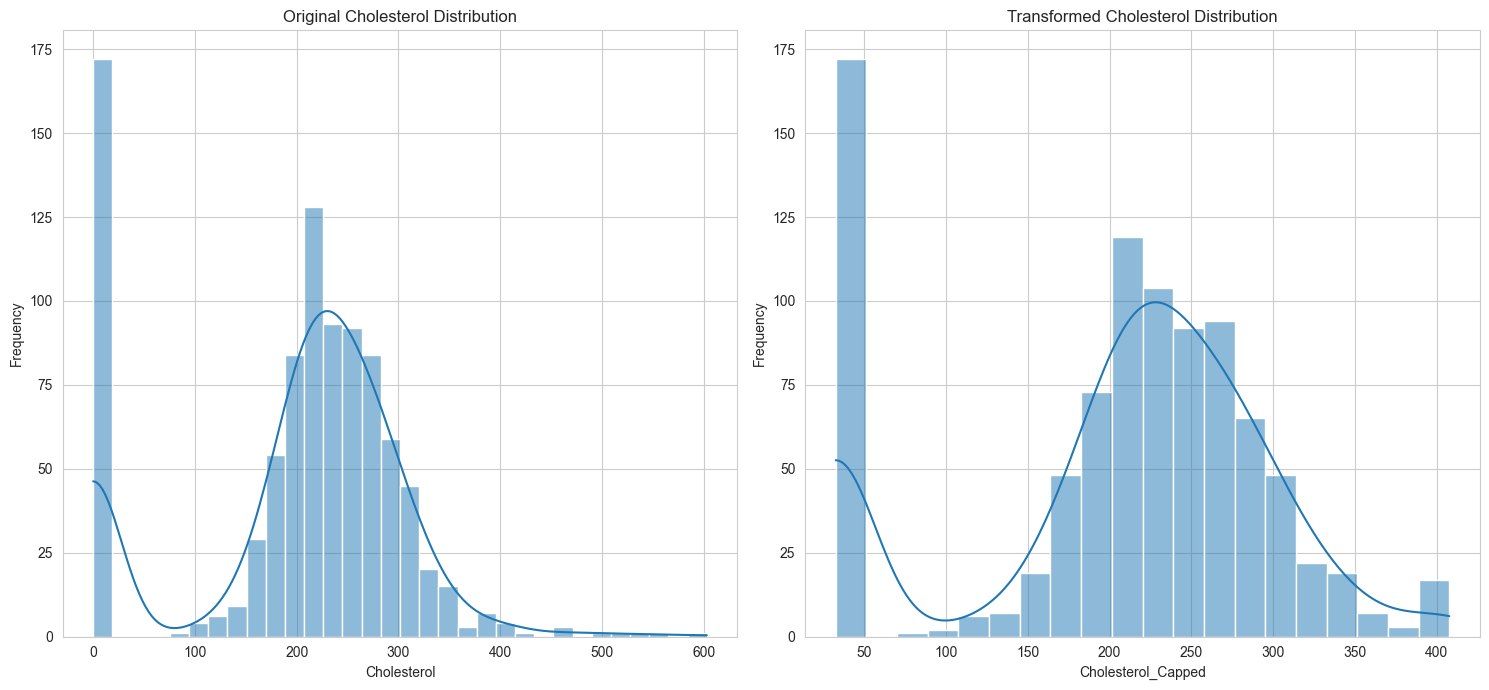

In [439]:
plot_original_vs_transformed_kde_hist(heart_failure_df,'Cholesterol', 'Cholesterol_Capped')

##### Replacing the Capped Columns with each feature and Dropping the Capped

In [440]:
heart_failure_df['MaxHR'] = heart_failure_df['MaxHR_Capped']
heart_failure_df['Oldpeak'] = heart_failure_df['Oldpeak_Capped']
heart_failure_df['RestingBP'] = heart_failure_df['RestingBP_Capped']
heart_failure_df['Cholesterol'] = heart_failure_df['Cholesterol_Capped']

heart_failure_df = heart_failure_df.drop(columns=['MaxHR_Capped','Oldpeak_Capped','RestingBP_Capped','Cholesterol_Capped'],index=1)

In [441]:
handled_outlier_feature = heart_failure_df.loc[:,['Age','RestingBP','Cholesterol', 'MaxHR', 'Oldpeak']]


#### 4.4.3 Show Histogram KDE Distirbution after Handling Outliers for `MaxHR` , `RestingBP` & `Oldpeak`

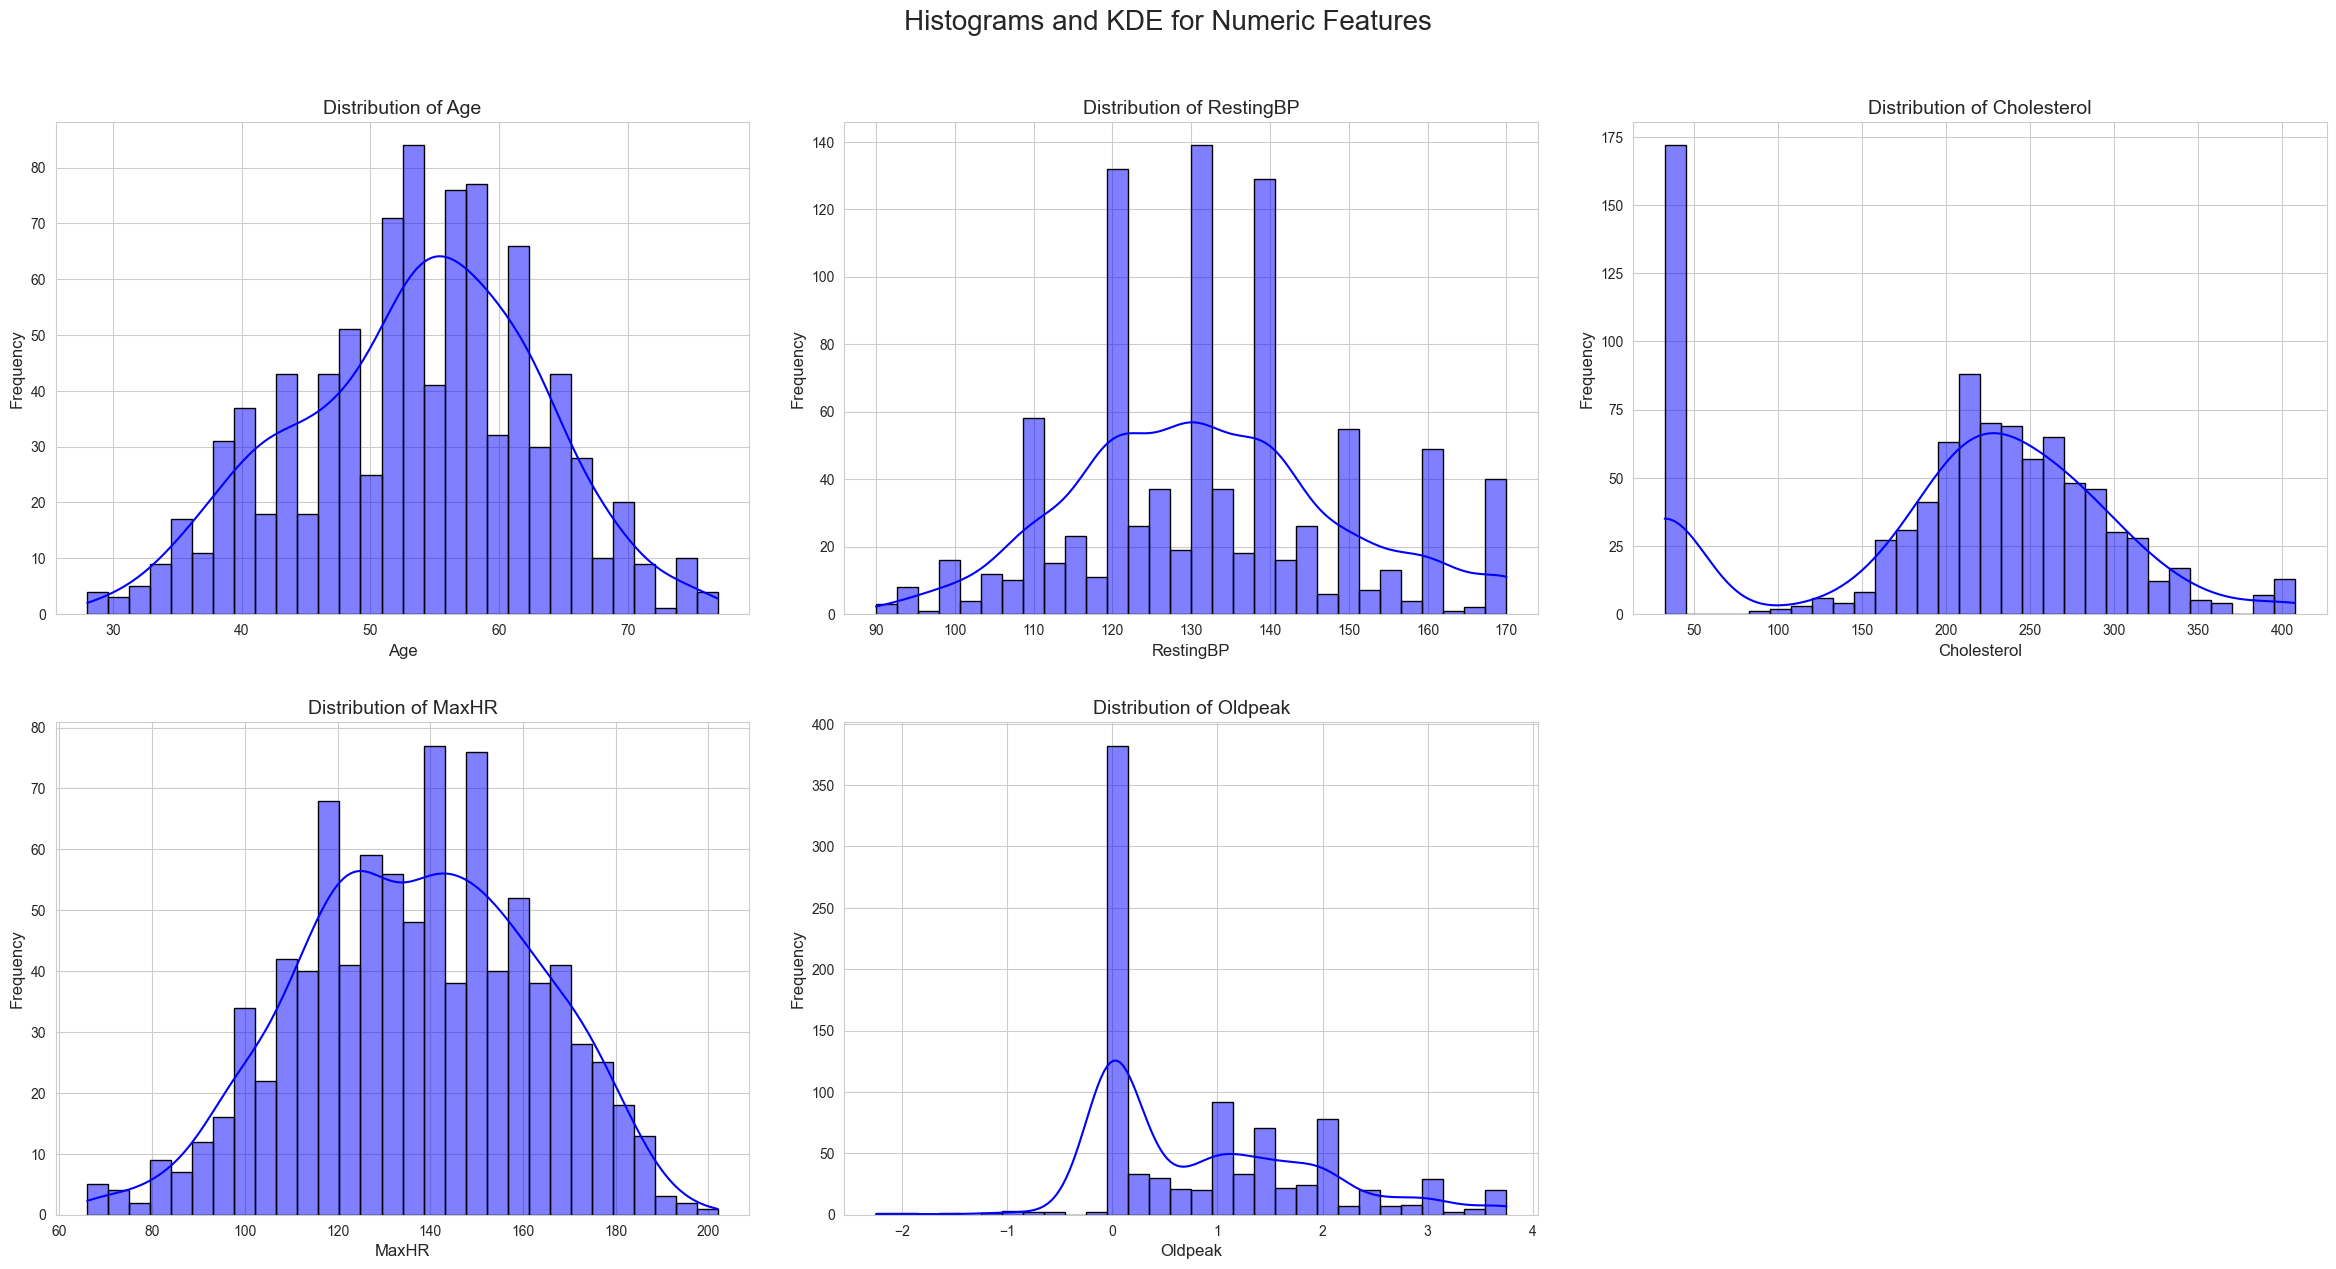

In [442]:
plot_histogram_kde_distirbution(heart_failure_df,handled_outlier_feature)

### 4.5 ◆ Binning & Smoothing




In [455]:
def plot_binned_distribution(df, column, title, xlabel, ylabel, color='skyblue'):

    df[column].value_counts().plot(kind='bar', color=color, edgecolor='black')
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=0, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### 4.5.1 Apply Binning for `Oldpeak`

Binning:  as Based on domain knowledge:
1. Normal: Values ≤ 0 (no depression, healthy heart).
2. Mild: Values between 0 and 1 (slight depression, possible risk).
3. Moderate: Values between 1 and 2 (moderate depression, likely risk).
4. Severe: Values > 2 (high depression, severe heart condition risk).


In [443]:
print(heart_failure_df['Oldpeak'].describe())


count    917.000000
mean       0.877644
std        1.032248
min       -2.250000
25%        0.000000
50%        0.600000
75%        1.500000
max        3.750000
Name: Oldpeak, dtype: float64


In [444]:

heart_failure_df['Oldpeak'] = pd.cut(
    heart_failure_df['Oldpeak'], 
    bins=[-np.inf, 0, 1, 2, np.inf], 
    labels=['Normal', 'Mild', 'Moderate', 'Severe']  
)


In [445]:
print(heart_failure_df['Oldpeak'].value_counts())


Oldpeak
Normal      381
Moderate    233
Mild        203
Severe      100
Name: count, dtype: int64


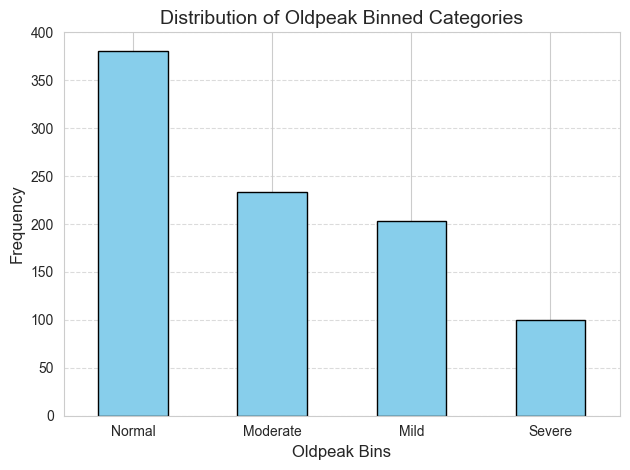

In [456]:
plot_binned_distribution(
    df=heart_failure_df, 
    column='Oldpeak', 
    title='Distribution of Oldpeak Binned Categories', 
    xlabel='Oldpeak Bins', 
    ylabel='Frequency'
)


### 4.5.2 Apply Binning for `Cholesterol`

Binning Based on cholesterol levels and medical guidelines:

1. Normal: Cholesterol levels < 200 mg/dL.
2. Borderline : Cholesterol levels 200–239 mg/dL.
3. High: Cholesterol levels ≥ 240 mg/dL

In [446]:
print(heart_failure_df['Cholesterol'].describe())


count    917.000000
mean     204.011314
std       95.971410
min       32.625000
25%      173.000000
50%      223.000000
75%      267.000000
max      407.625000
Name: Cholesterol, dtype: float64


In [447]:
heart_failure_df['Cholesterol'] = pd.cut(
    heart_failure_df['Cholesterol'], 
    bins=[-np.inf, 200, 240, np.inf], 
    labels=['Normal', 'Borderline', 'High']
)


In [448]:
print(heart_failure_df['Cholesterol'].value_counts())


Cholesterol
High          355
Normal        321
Borderline    241
Name: count, dtype: int64


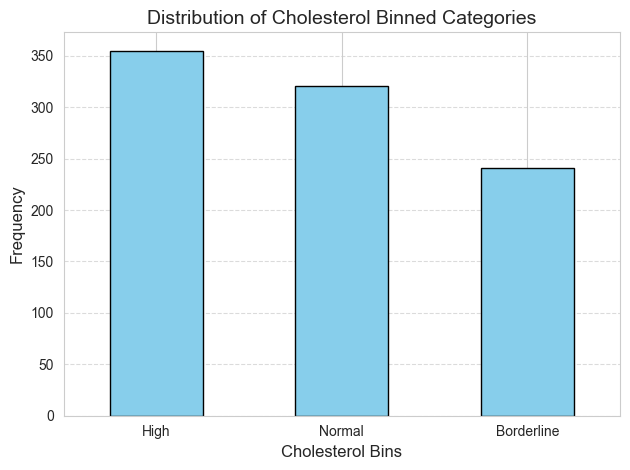

In [457]:
plot_binned_distribution(
    df=heart_failure_df, 
    column='Cholesterol', 
    title='Distribution of Cholesterol Binned Categories', 
    xlabel='Cholesterol Bins', 
    ylabel='Frequency'
)

### 4.6 ◆ Normalization and Standardization




#### 4.6.1 Plotting QQ plot for numeric features 

In [449]:
features_to_be_normalized = heart_failure_df.loc[:,['Age','RestingBP', 'MaxHR']]


In [450]:

def QQ_plotting(df, feature_names_df, figsize=(8, 6)):
    for col in feature_names_df:
        plt.figure(figsize=figsize)
        sm.qqplot(df[col], line='s')
        plt.title(f'QQ Plot for {col}', fontsize=14)
        plt.xlabel('Theoretical Quantiles', fontsize=12)
        plt.ylabel('Sample Quantiles', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

<Figure size 800x600 with 0 Axes>

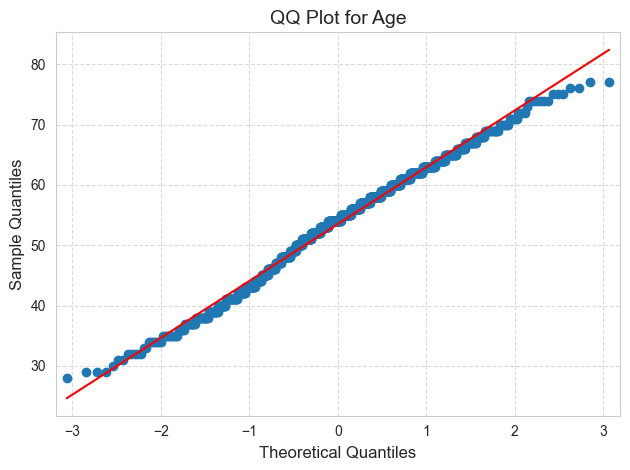

<Figure size 800x600 with 0 Axes>

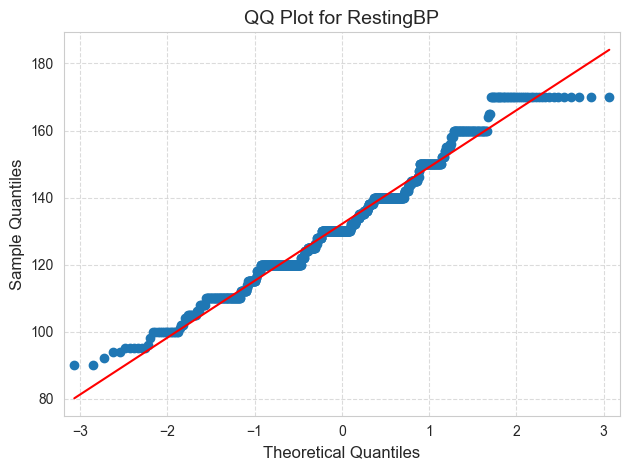

<Figure size 800x600 with 0 Axes>

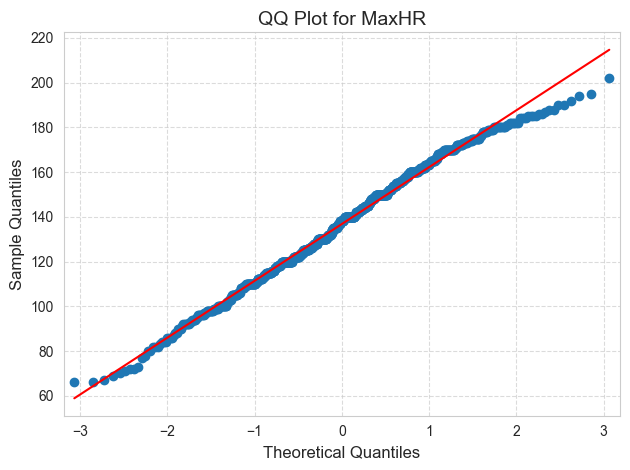

In [451]:
QQ_plotting(heart_failure_df,features_to_be_normalized)

### Choosing StandardScaler or MinMaxScaler for Each Feature

1. `Age` (QQ Plot 1):
   -  StandardScaler: Age is approximately normally distributed, as shown by the linear alignment with the QQ plot line. StandardScaler is ideal for features with normal or near-normal distributions.

2. `RestingBP` (QQ Plot 2):
   - StandardScaler: RestingBP shows a normal-like distribution with some deviations, making StandardScaler suitable to maintain its mean-centered properties.


3. `MaxHR` (QQ Plot 4):
   - StandardScaler: MaxHR has a nearly normal distribution. StandardScaler will effectively normalize it, centering it around zero with unit variance.


### Summary:
- StandardScaler: `Age`, `RestingBP`, `MaxHR` (approximately normal distributions).

#### 4.6.2 Using StandardScaler for `Age` , `RestingBP` and `MaxHR` 

In [452]:
standard_scaler_features = ['Age','RestingBP','MaxHR']
sc = StandardScaler()
heart_failure_df[standard_scaler_features] = sc.fit_transform(heart_failure_df[standard_scaler_features])

In [453]:
heart_failure_df.describe()

,Age,RestingBP,FastingBS,MaxHR,HeartDisease
count,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,917.000000
mean,-1.084798e-16,5.230276e-16,0.233370,4.804106e-16,0.552890
std,1.000546e+00,1.000546e+00,0.423206,1.000546e+00,0.497466
min,-2.705400e+00,-2.480790e+00,0.000000,-2.784684e+00,0.000000
25%,-6.908609e-01,-7.127908e-01,0.000000,-6.607202e-01,0.000000
50%,5.133761e-02,-1.234579e-01,0.000000,4.726783e-02,1.000000
75%,6.875078e-01,4.658751e-01,0.000000,7.552558e-01,1.000000
max,2.489990e+00,2.233874e+00,1.000000,2.564559e+00,1.000000


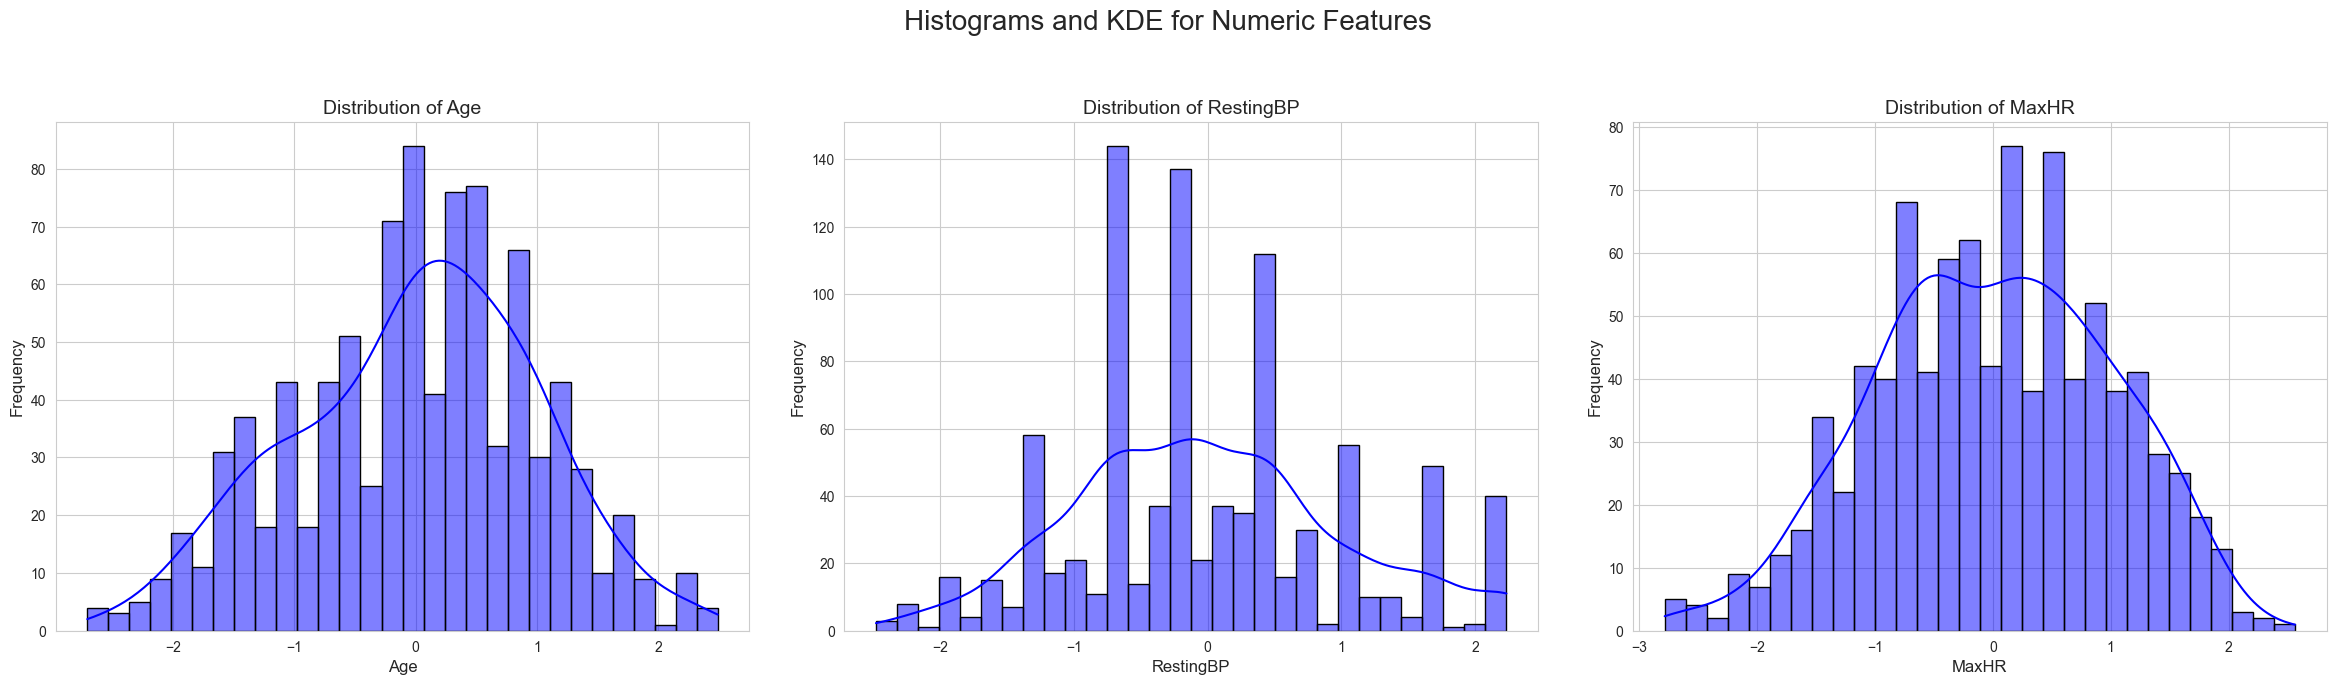

In [454]:
plot_histogram_kde_distirbution(heart_failure_df,features_to_be_normalized)

### 4.7 ◆ Feature Encoding 
